In [2]:
# import numpy as np
import base64
import pandas as pd
# -*- coding: utf-8 -*-
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
from gensim import corpora, models, similarities
import random
from collections import Counter
from __future__ import division
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download('popular')
stop_words = stopwords.words('german')
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
print "all imports worked nicely"
import os
import tensorflow as tf
import numpy as np
# import fasttext
from tensorflow.contrib.tensorboard.plugins import projector
from tqdm import tqdm

all imports worked nicely


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [2]:
# Word Vectors
# load the GloVe vectors in a dictionary:

# embeddings_index = {}
# f = open('/home/D072852/glove.840B.300d.txt')
# for line in tqdm(f):
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

embeddings_index_de = {}
f = open('/home/D072852/wiki.de.vec')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_de[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_de))

2275234it [02:32, 14904.05it/s]

Found 2275234 word vectors.


In [3]:
# Or the model could be loaded in this way using Gensim functions:
%time
model_wiki_de = gensim.models.KeyedVectors.load_word2vec_format("wiki.de.vec", binary=False)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [4]:
# working with embeddings from source https://devmount.github.io/GermanWordEmbeddings/
# get trained model
%time model = gensim.models.KeyedVectors.load_word2vec_format("german.model", binary=True)
print "model data loaded sucessfully.."
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]
#     vectors = []
#     for word in words:
#         if word in model:
#             vectors.append(model[word])
    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

CPU times: user 8.92 s, sys: 672 ms, total: 9.59 s
Wall time: 9.59 s
model data loaded sucessfully..


In [7]:
# len(embeddings_index_de)
i = 4
for key, value in model.vocab.iteritems() :
    if "Indien" in key:
        print key
#     print len(embeddings_index_de[key])
#     print embeddings_index_de[key]
#     i = i-1
#     if i<1:
#         break
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
# # words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# # words = ["ftdna","tiergartenviertels","soestdijk","panikartiger"]
# for key in words:
#     if key.lower() in embeddings_index_de:
#         print key, embeddings_index_de[key.lower()]
#     else:
#         print key + " key(s) not present in dictionary"

In [8]:
# get trained model
%time model02 = gensim.models.KeyedVectors.load_word2vec_format("GER64", binary=False)
# model03 = gensim.models.KeyedVectors.load("de.bin")
# gensim --V

In [9]:
# ------------------EVALUATING different word embeddings ------------------------------------------------------------------
# Checking the vocabulary size for different embeddings
# print len(word_vectors.vocab)
print len(model_wiki_de.vocab)
print len(model02.vocab)
print len(model.vocab)

model_wordList = model.index2word
print type(model_wordList), len(model_wordList)
print "First 50 words in Model01 vocabulary are: ",  ','.join(model_wordList[:50])
# model.vocab gives you a dictionary sort of embedding_index_de
# print type(word_vectors.vocab)
# fasttext_wordList = word_vectors.index2word
fasttext_wordList = model_wiki_de.index2word
print type(fasttext_wordList), len(fasttext_wordList)
print "First 50 words in model_wiki_de vocabulary are: ",  ','.join(fasttext_wordList[:50])

ger64_wordList = model02.index2word
print type(ger64_wordList), len(ger64_wordList)
print "First 50 words in Model02 vocabulary are: ",  ','.join(ger64_wordList[:50])

# googleNeg_wordList = model03.index2word
# print type(googleNeg_wordList), len(googleNeg_wordList)
# print googleNeg_wordList[:50]


# plot currencies
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
# draw_words(model, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

# words = ["Schweiz","Franken","Deutschland","Euro","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna","Indien", "Rupee"]
# draw_words(model02, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

# model.doesnt_match("wurst senf brezn apfel".split())
# model02.doesnt_match("wurst senf brezn apfel".split())

# words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]
# words  = ["Athen","Griechenland","Berlin","Deutschland","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# draw_words(model, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')
# draw_words(model02, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')


2275233
2001952
608130
<type 'list'> 608130
First 50 words in Model01 vocabulary are:  Die,fuer,wurde,Der,dass,Das,ueber,In,Im,wurden,Er,Sie,Jahr,mehr,zwei,Es,Nach,sowie,ab,Jahren,Jahre,sei,Am,beim,drei,seit,koennen,schon,Euro,Stadt,Mit,ersten,Ein,Auch,gibt,etwa,bereits,jedoch,Zeit,immer,Uhr,Als,Bei,1,Ende,heute,Fuer,sagte,Von,konnte
<type 'list'> 2275233
First 50 words in model_wiki_de vocabulary are:  .,,,</s>,-,der,),die,(,und,in,von,',den,im,das,des,mit,ist,er,zu,für,auf,ein,als,dem,eine,wurde,–,auch,sich,nicht,an,es,nach,war,bei,aus,rd,am,sie,cest,bis,",ich,einer,zum,werden,sind,oder,wird
<type 'list'> 2001952
First 50 words in Model02 vocabulary are:  </s>,.,,,der,die,und,in,'',den,``,:,mit,das,von,zu,-,im,auf,sich,ist,für,Die,dem,ein,nicht,-RRB-,-LRB-,des,es,eine,auch,an,am,aus,als,bei,hat,Der,dass,er,nach,sie,werden,um,Das,war,noch,sind,einem,wird


In [9]:
# load model
# word2vec = fasttext.load_model('wiki.en.bin')

# create a list of vectors
# embedding = np.empty((len(word2vec.words), word2vec.dim), dtype=np.float32)
# for i, word in enumerate(word2vec.words):
#     embedding[i] = word2vec[word]

# embedding = np.empty((len(embeddings_index), 300), dtype=np.float32)
# i = 0
# for key, value in embeddings_index.iteritems() :
#     embedding[i] = value
#     i = i+1

embedding_de = np.empty((len(embeddings_index_de), 300), dtype=np.float32)
i = 0
for key, value in embeddings_index_de.iteritems() :
    embedding_de[i] = value
    i = i+1

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.Variable([0.0], name='embedding_de')
place = tf.placeholder(tf.float32, shape=embedding_de.shape)
set_x = tf.assign(X, place, validate_shape=False)
sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: embedding_de})

# write labels
with open('/home/D072852/log/metadata_de.tsv', 'w') as f:
    for key in embeddings_index_de.iteritems() :
        f.write(key[0] + '\n')

# create a TensorFlow summary writer
summary_writer = tf.summary.FileWriter('/home/D072852/log', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
embedding_conf.tensor_name = 'embedding_de:0'
embedding_conf.metadata_path = os.path.join('/home/D072852/log', 'metadata_de.tsv')
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, os.path.join('/home/D072852/log', "model_de.ckpt"))

NameError: name 'embeddings_index_de' is not defined

In [10]:
# Setting up word embeddings to be visualized in Tensor Board - 
# load model
# word2vec = fasttext.load_model('wiki.en.bin')

# create a list of vectors
embedding = np.empty((len(model02.vocab), 64), dtype=np.float32)
for i, word in enumerate(model02.vocab):
    embedding[i] = model02[word]

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.Variable([0.0], name='embedding')
place = tf.placeholder(tf.float32, shape=embedding.shape)
set_x = tf.assign(X, place, validate_shape=False)
sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: embedding})

# write labels, creating a meta file -
with open('/home/D072852/log/metadata_de_model02.tsv', 'w') as f:
    for key in model02.vocab.iteritems() :
        f.write(key[0].encode('utf-8') + '\n')

# create a TensorFlow summary writer
summary_writer = tf.summary.FileWriter('/home/D072852/log', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
embedding_conf.tensor_name = 'embedding:0'
embedding_conf.metadata_path = os.path.join('/home/D072852/log', 'metadata_de_model02.tsv')
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, os.path.join('/home/D072852/log', "model_de_model02.ckpt"))

'/home/D072852/log/model_de_model02.ckpt'

In [10]:
# Function to visualize 2D vectors using PCS/Tsne
# function draw_words
# ... reduces dimensionality of vectors of given words either with PCA or with t-SNE and draws the words into a diagram
# @param word2vec model     to visualize vectors from
# @param list     words     list of word strings to visualize
# @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
# @param bool     alternate use different color and label align for every second word
# @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
# @param float    x1        x axis range (from)
# @param float    x2        x axis range (to)
# @param float    y1        y axis range (from)
# @param float    y2        y axis range (to)
# @param string   title     for diagram
def draw_words_fasttext(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word.lower()] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

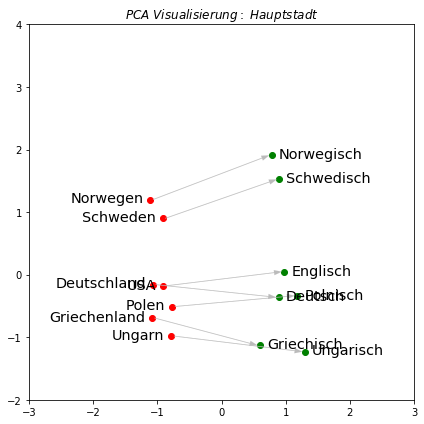

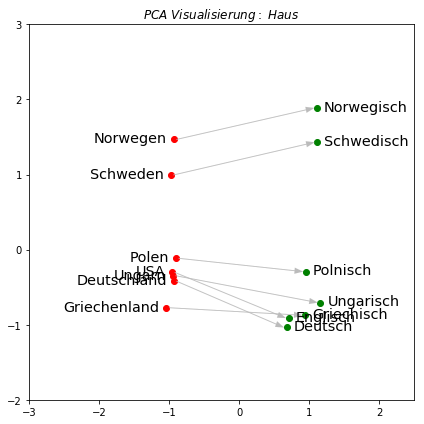

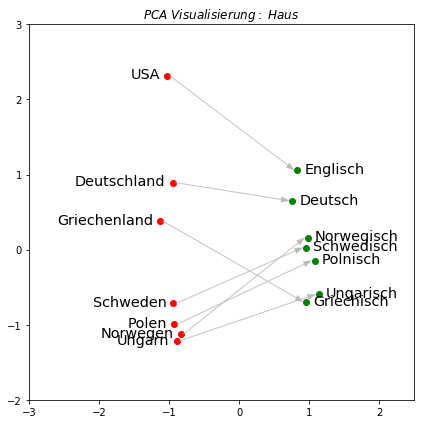

In [11]:
# plot currencies
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","pund/pfund","Japan","Yen","Russland","Rubel","USA","usdollar","Kroatien","Kuna","Indien", "Rupee"]
# words  = ["Athen","Griechenland","Berlin","Deutschland","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
words = ["Deutschland","Deutsch","USA","Englisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
# words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]

# draw_words(embeddings_index_de, words, True, True, True, -3, 3, -2, 6, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')
draw_words_fasttext(model_wiki_de, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ Hauptstadt$')
draw_words(model, words, True, True, True, -3, 2.5, -2, 3, r'$PCA\ Visualisierung:\ Haus$')
draw_words(model02, words, True, True, True, -3, 2.5, -2, 3, r'$PCA\ Visualisierung:\ Haus$')


In [15]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/home/D072852/wiki.de.vec', binary=False)  # C text format
# word_vectors01 = KeyedVectors.load_word2vec_format('/home/D072852/wiki.de.bin', binary=True)  # C binary format
# word_vectors.save('/home/D072852/word_vectors_fbDE')
# word_vectors01 = KeyedVectors('/home/D072852/word_vectors_fbDE')
# print word_vectors01
# word_vectors01.cosine_similarities('frau','mann')

[(u'kindern', 0.796553373336792), (u'enkelkinder', 0.7761600017547607), (u'#kinder', 0.7728991508483887), (u'\xbbkinder', 0.7651199102401733), (u'kleinkinder', 0.7651147842407227), (u'enkelkindern', 0.7576228976249695), (u'kindeskinder', 0.7451964616775513), (u'urenkelkinder', 0.7424343824386597), (u'einzelkinder', 0.7415428757667542), (u'kinder/jugendliche', 0.7330327033996582)]


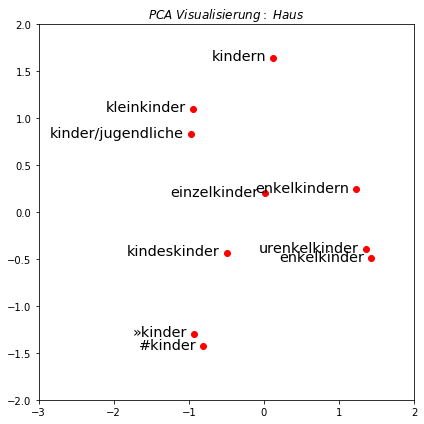

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'koenige', 0.9254183769226074),
 (u'koenigin', 0.9117095470428467),
 (u'koenigi', 0.8989173173904419),
 (u'bkoenig', 0.8936635851860046),
 (u'erlkoenig', 0.8904488682746887),
 (u'koenigs', 0.8678578734397888),
 (u'koeniger', 0.8672288060188293),
 (u'koenigl', 0.8639868497848511),
 (u'koenigsfeld', 0.8413063883781433),
 (u'heussner', 0.8398495316505432)]

In [8]:
# word_vectors.wv.similarity('frau', 'man')
matches = word_vectors.most_similar(positive=["kinder"], negative=[], topn=10)
print matches
words = [match[0] for match in matches]
draw_words_fasttext(word_vectors, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')
word_vectors.wv.most_similar_cosmul(positive=['frau', 'koenig'], negative=['mann'])

In [12]:
# Kerze + Feuerzeug = brennende_Kerze
# plot related words to 'house'
matches = model.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
# draw_words(model, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')

print model.wv.most_similar_cosmul(positive=['Frau', 'Koenig'], negative=['Mann'])
print model.wv.most_similar_cosmul(positive=['Obama', 'Russland'], negative=['USA'])
print model.wv.most_similar_cosmul(positive=['Kerze', 'Feuerzeug'])

matches = model02.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
# draw_words(model02, words, True, False, False, -3, 2, -2, 3, r'$PCA\ Visualisierung:\ Haus$')
# model02.wv.most_similar_cosmul(positive=['Frau', 'Koenig'], negative=['Mann'])
model02.wv.most_similar_cosmul(positive=['Obama', 'Russland'], negative=['USA'])
# model02.wv.most_similar_cosmul(positive=['Kerze', 'Feuerzeug'])


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'Koenigin', 0.9604154229164124), (u'Prinzessin', 0.9353479743003845), (u'Jungschuetzenkoenigin', 0.9134643077850342), (u'Prinz', 0.9023544788360596), (u'Regentin', 0.8993106484413147), (u'Schuetzenkoenigin', 0.8981477618217468), (u'Erntekoenigin', 0.8974711298942566), (u'Majestaet', 0.8957144618034363), (u'Carl_XVI', 0.8947469592094421), (u'Kaiserin', 0.8943732380867004)]
[(u'Putin', 0.9586252570152283), (u'US-Praesident_Obama', 0.9078115224838257), (u'Russlands_Staatschef', 0.9003345966339111), (u'Wladimir_Putin', 0.8979546427726746), (u'russischen_Praesidenten', 0.8963831067085266), (u'Barack_Obama', 0.8915544152259827), (u'Kremlchef_Wladimir', 0.8879683613777161), (u'Russlands_Praesident', 0.8851548433303833), (u'US-Aussenminister_Kerry', 0.881401538848877), (u'US-Praesident_Barack', 0.8757231831550598)]
[(u'brennende_Kerze', 0.7145117521286011), (u'Herdplatte', 0.710566520690918), (u'brennende_Zigarette', 0.6972489356994629), (u'Teelicht', 0.6950814127922058), (u'Grablicht', 0.6

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'Putin', 1.0135201215744019),
 (u'Poroschenko', 1.0086878538131714),
 (u'Jazenjuk', 0.9955540895462036),
 (u'Biden', 0.9941121339797974),
 (u'Janukowitsch', 0.991157591342926),
 (u'Medwedjew', 0.9903574585914612),
 (u'Medwedew', 0.9889390468597412),
 (u'Karsai', 0.9872202277183533),
 (u'Assad', 0.9869940280914307),
 (u'Kerry', 0.9860815405845642)]

('Number of rows, columns in train dataset : ', (20000, 10))
Index([u'MATNR', u'ARTIDENTNO', u'ADDITIONALTEXT', u'RATING', u'RATINGTITEL',
       u'RATINGTEXT', u'RATEDAT', u'SCHLAGWORT', u'CATEGORY', u'THEME'],
      dtype='object')
MATNR             object
ARTIDENTNO         int64
ADDITIONALTEXT    object
RATING             int64
RATINGTITEL       object
RATINGTEXT        object
RATEDAT           object
SCHLAGWORT        object
CATEGORY          object
THEME             object
dtype: object
Before removing the duplicates
count                                                 20000
unique                                                  247
top       <p>Erstens kommt es anders &amp;#8230;</p><p>V...
freq                                                   1248
Name: ADDITIONALTEXT, dtype: object
AFTER removing the duplicates
count                                                   247
unique                                                  247
top       Fast zu schön zum Vernaschen: klein

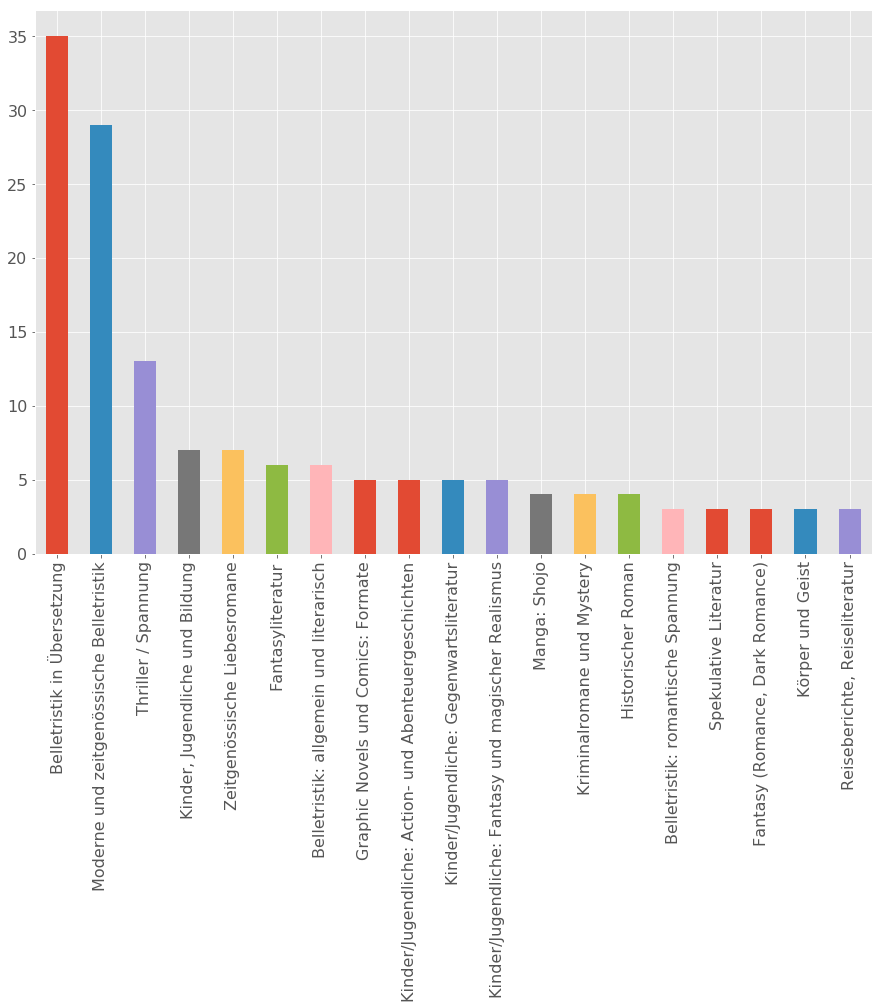

In [13]:
# --------------------------------------------------------------------------------------------
# ----Beginning with data processing and Thalia Bookstore data specific implementations-------
# ---------------------------------------------------------------------------------------------
# function taking data frame as input preprocess and return another data frame
def dataPreprocess(train) :
    train = train.iloc[:, :-1]
    train.drop(train.columns[0], axis=1, inplace=True)
    print("Number of rows, columns in train dataset : ",train.shape)
    print train.columns
    print train.dtypes
    train.head(2)
    print "Before removing the duplicates\n", train['ADDITIONALTEXT'].describe()
    # dropping the rows with duplicate values in Additional text field -
    train.drop_duplicates(subset='ADDITIONALTEXT', keep="first", inplace=True)
    print "AFTER removing the duplicates\n", train['ADDITIONALTEXT'].describe()
    train.head(2)
    return train

def dataVisualise(train) :
    # trying some plotting of data wrt THEMES
    import matplotlib as mpl
    # Just making the plots look better
    mpl.style.use('ggplot')
    mpl.rcParams['figure.figsize'] = (8,6)
    mpl.rcParams['font.size'] = 16
    print "CHECKING for themes now\n", train['THEME'].describe()
    # trying to filter out the long tail and keep only themes with count more than 3
    counts = train['THEME'].value_counts()
    counts1 =  counts[counts >= 2]
    print "DISTRIBUTION of THEMES:"
    print counts1
    plot_data_theme = train[train['THEME'].isin(counts[counts >= 3].index)]
    plot_data_theme['THEME'].value_counts().plot.bar(y='THEME', figsize=(15,10))

    print "CHECKING for keywords now\n", train['SCHLAGWORT'].describe()
    counts = train['SCHLAGWORT'].value_counts()
    counts2 = counts[counts >= 2]
    print "DISTRIBUTION of Schlagworts:"
    print counts2
#     plot_data_schlagwort = train[train['SCHLAGWORT'].isin(counts[counts >= 4].index)]
#     plot_data_schlagwort['SCHLAGWORT'].value_counts().plot.bar(figsize=(25,10))

    # We can see there are only two categories - Subject and Main Subject.
    print "CHECKING for categories now\n", train['CATEGORY'].describe()

train2 = pd.read_csv("/home/D072852/Thalia_data/thalia.csv", sep='|', skiprows = range(1, 10000), nrows=20000)
train2 = dataPreprocess(train2)

dataVisualise(train2)


('Number of rows, columns in train dataset : ', (30000, 10))
Index([u'MATNR', u'ARTIDENTNO', u'ADDITIONALTEXT', u'RATING', u'RATINGTITEL',
       u'RATINGTEXT', u'RATEDAT', u'SCHLAGWORT', u'CATEGORY', u'THEME'],
      dtype='object')
MATNR             object
ARTIDENTNO         int64
ADDITIONALTEXT    object
RATING             int64
RATINGTITEL       object
RATINGTEXT        object
RATEDAT           object
SCHLAGWORT        object
CATEGORY          object
THEME             object
dtype: object
Before removing the duplicates
count                                                 30000
unique                                                  611
top       <p>Erstens kommt es anders &amp;#8230;</p><p>V...
freq                                                   1248
Name: ADDITIONALTEXT, dtype: object
AFTER removing the duplicates
count                                                   611
unique                                                  611
top       <p>Dies ist die Geschichte einer ma

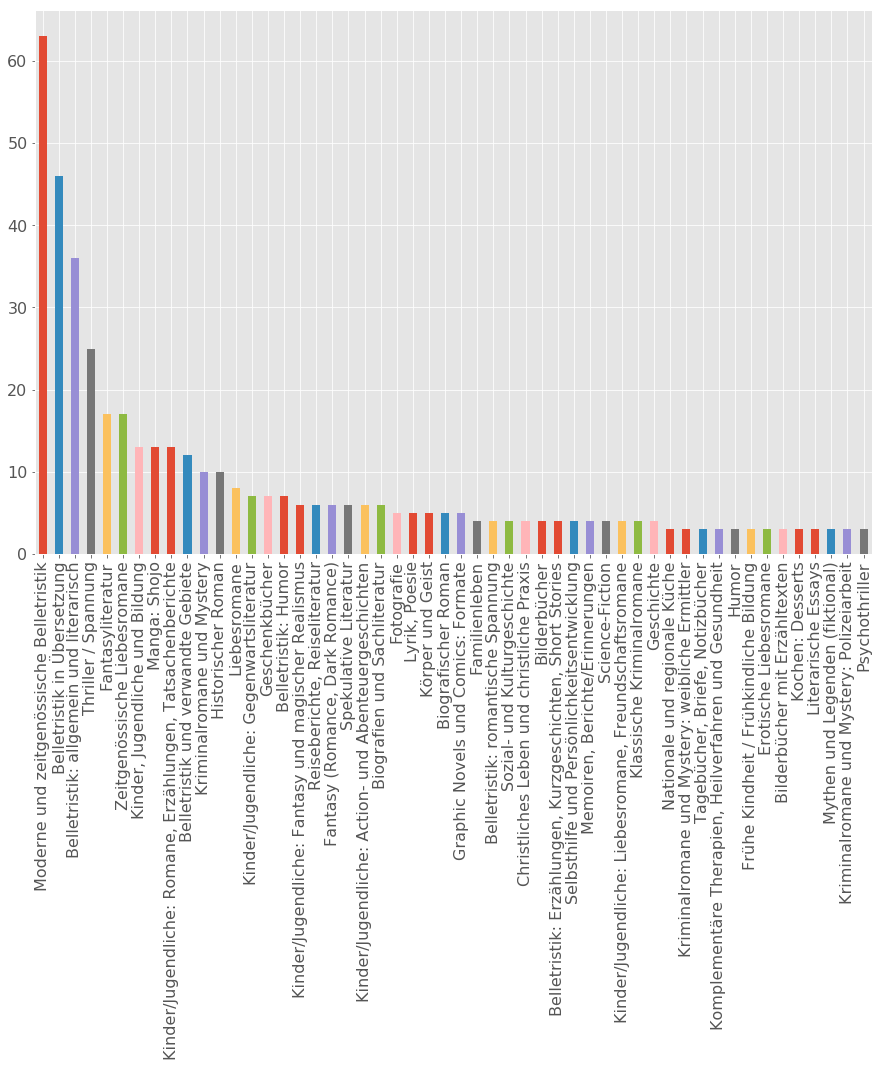

In [14]:
# taking data input and processing, reading first nrows ONLY
train = pd.read_csv("/home/D072852/Thalia_data/thalia.csv", sep='|', nrows=30000)
train = dataPreprocess(train)

# trying some plotting of data wrt THEMES
dataVisualise(train)
# # print train['ADDITIONALTEXT'].nunique()

print "----------------------------------------------------------------"

train_text = train['ADDITIONALTEXT'].tolist()
train_id = train['MATNR'].tolist()
train_theme = train['THEME'].tolist()
train_schalgwort = train['SCHLAGWORT'].tolist()
# for s in train_theme:
#     s = s.decode('utf-8')
print len(train_id)
print type(train_id)
print train_id[:5]
print len(train_text)
print type(train_text)
print train_text[:5]
# handling the unicode encoding in the data set
for s in train_theme[:5]:
    print s.decode('utf-8')
total_len = 0
# calculating the average text lenght in training corpus
for s in train_text:
    total_len = total_len + len(s.split())
average_text_len = total_len/len(train_text)

print "Average length of the documents in training corpus is", average_text_len

In [15]:
# Actual data preprocessing starts from here - 
# list of Deutsche stop words
# print stop_words
# print len(stop_words)

# load nltk's SnowballStemmer as variabled 'stemmer'
# NOTE - this stemmer works by brute force chunking of fthe "en"/"es" from word endings plus it removes 1. casing information 2. Umlaut and special character information. On the whole lot of information loss. Advice to use SPACY lemmatizer.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("german")

# Lemmatizer does NOT work for Deutsche language 
# from nltk.stem import WordNetLemmatizer
# wnl = WordNetLemmatizer()

# generating list of stop_words with title case to be removed from text as well
stop_words_caps = [word.title() for word in stop_words]
stop_words.extend(stop_words_caps)
# extra missing (variations of) stop words that pop up in data
extra_stop_words = ["dass","amp", "Und", "her", "Her"]
stop_words.extend(extra_stop_words)
# print stop_words, len(stop_words)
# print stop_words_caps, len(stop_words_caps)

# Here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2:
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) 
#     and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2:
            filtered_tokens.append(token)
    return filtered_tokens

#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag
def strip_proppers_POS(text):
    tagged = pos_tag(text) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

print "BEFORE preprocess text looks like - "
print train_text[2]

#tokenize
%time tokenized_text = [tokenize_only(text.decode('utf-8')) for text in train_text]
%time tokenizedStemmed_text = [tokenize_and_stem(text.decode('utf-8')) for text in train_text]

print "done with tokenisation","After tokenisation text is -"
# print tokenized_text[0]
for word in tokenized_text[2]:
    print word,    
    
#remove stop words
%time texts = [[word for word in text if word not in stop_words] for text in tokenized_text]
print "done with stop word removal","After stop word removal text is -"
for word in texts[2]:
    print word,
#remove proper names -  doesnt work very well, removes all the words with first letter capital
# %time preprocess = [strip_proppers_POS(doc) for doc in texts]
# print "done with Proper Noun removal", "After Proper noun removal text is - "
# # print preprocess[0]
# for word in preprocess[0]:
#     print word,

#create a Gensim dictionary from the texts
from gensim import corpora, models, similarities 

%time dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
%time dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
%time corpus = [dictionary.doc2bow(text) for text in texts]

# Initialising LDA model 
%time lda = models.LdaModel(corpus, num_topics=30, id2word=dictionary, update_every=5,chunksize=10000, passes=100)

BEFORE preprocess text looks like - 
<p>Hana verliebt sich in einen mysteriösen jungen Mann, doch dieser hat ein Geheimnis: Er stammt vom Geschlecht der japanischen Wölfen ab, die schon seit über hundert Jahren ausgestorbenen sind und ist daher halb Mensch und halb Wolf. Hana wird schwanger und bekommt bald darauf ihr erstes Kind, Yuki. Als im Jahr darauf Ame geboren wird, stirbt der Vater, als er in Wolfsgestalt durch die Stadt läuft. Von nun an wachsen die beiden Kinder bei ihrer jungen Mutter auf. Doch schon bald kommt es zu Schwierigkeiten, da sich die Kinder immer wieder in Wölfchen verwandeln. Und Hana muss sich überlegen, wie sie ihre kleine Familie beschützen kann.</p>
CPU times: user 1.17 s, sys: 12.2 ms, total: 1.18 s
Wall time: 1.17 s
CPU times: user 1.66 s, sys: 16.5 ms, total: 1.67 s
Wall time: 1.66 s
done with tokenisation After tokenisation text is -
Hana verliebt sich einen mysteriösen jungen Mann doch dieser hat ein Geheimnis stammt vom Geschlecht der japanischen Wölfe

In [17]:
print type(train_text), len(train_text)
print type(texts), len(texts)

# experimenting with spaCy now
import spacy
nlp = spacy.load('de')
# doc = nlp(train_text[0].decode('utf-8') )
# for token in doc:
#     print token, token.lemma_

def tokenize_and_stemSpacy(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2:
            filtered_tokens.append(token)
    # doing this trick of joining tokens to make a string as spacy wont take list but needs a string.
    filtered_tokens = nlp((' ').join(filtered_tokens))
    stems = [t.lemma_ for t in filtered_tokens]
    return stems

tokenLemma_text = [tokenize_and_stemSpacy(text.decode('utf-8')) for text in train_text]
#remove stop words
%time texts_lemmatized = [[word for word in text if word not in stop_words] for text in tokenLemma_text]
%time texts_stemmed = [[word for word in text if word not in stop_words] for text in tokenizedStemmed_text]

print type(texts_lemmatized), len(texts_lemmatized)
print type(texts_stemmed), len(texts_stemmed)
# print "Before lemmatization data looked like this--->" 
# print (' ').join(texts[0])
# print "AFTER lemmatization data looked like this--->"
# print (' ').join(texts_lemmatized[0])

# doc = nlp(train_text[0].decode('utf-8') )
# for token in doc:
#     print token, token.lemma_
# for token in texts[0]:
#     print (stemmer.stem(token)).encode('utf-8')

<type 'list'> 611
<type 'list'> 611
CPU times: user 399 ms, sys: 0 ns, total: 399 ms
Wall time: 399 ms
CPU times: user 406 ms, sys: 21.1 ms, total: 427 ms
Wall time: 415 ms
<type 'list'> 611
<type 'list'> 611


In [24]:
# lda.show_topic(29)
# print train_text[2]
print train.iloc()[0]['ADDITIONALTEXT']
print
print train_text[0]
print "---------NOW tokenisation sentences --------"
for word in tokenized_text[0]:
    print word,
print "---------NOW STOP Words removal sentences --------"
for word in texts[0]:
    print word,
vec = dictionary.doc2bow(texts[2])
print vec
topics_list = lda[vec]
print topics_list
# print type(corpus)
# doc_lda = lda[corpus[0]]
# print corpus[0]
# print doc_lda
lda.show_topic(27)
# train.loc[35, 'ADDITIONALTEXT']
# train.head()

PECUNIA<br>Der Versicherungs-Ratgeber von Dirk Magnutzki<br>Sicher vorgesorgt - EINFACH, VERSTÄNDLICH, NACHVOLLZIEHBAR, das versteht wirklich jeder!<br>Vollkommen neu und innovativ, Deutschlands 1. Versicherungs- Ratgeber mit über 20 Videobeiträgen durch QR- Codes zum besseren Verständnis hinterlegt. Schnell, einfach und verständlich setzt dieses Video-Buch neue Maßstäbe. Endlich ein Buch für alle Lesertypen ganz gleich ob Allesleser, Nachschlager oder Querleser. Hier kommt jeder auf seine Kosten.<br />Schluss mit dem Chaos in Sachen Versicherungen!<br />Jeder rät etwas anderes, die Verbraucher sind verunsichert, die Themen Vorsorge und Versicherungsschutz schmücken die Hass-Ecke im Aktenschrank. Sind Lebens-Rentenversicherungen nun gut oder schlecht? Ist die hoch gepriesene staatliche Förderung der privaten Altersvorsorge ein Flop oder doch sinnvoll? Wie sollte man sich am besten krankenversichern? Und welche Sachversicherungen braucht man eigentlich für sein Hab und Gut?<br>Der Diplo

[(u'Buch', 0.010433123),
 (u'gro\xdfe', 0.004704453),
 (u'Leben', 0.004183666),
 (u'Star', 0.0036628768),
 (u'Wars', 0.0036628768),
 (u'Geschichte', 0.0036628768),
 (u'Liebe', 0.0031420887),
 (u'Sticker', 0.003142088),
 (u'LEGO\xae', 0.002621301),
 (u'Gesellschaft', 0.002621301)]

In [21]:
# tuning classification of movie plots by "genre" using gensim to fit our data
# https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/Document%20classification%20with%20word%20embeddings%20tutorial.ipynb
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

# for s in train_theme[:5]:
#     print s.decode('utf-8')
# for s in train_theme[:5]:
#     print s

train_theme_unique = list(set(train_theme))
print "Number of unique themes in first %s books are %s" %(len(train_theme), len(train_theme_unique))
# for theme in train_theme_unique:
#     print theme

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(train_theme_unique))
    target_names = train_theme_unique
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def  evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['ADDITIONALTEXT'])
    predictions = classifier.predict(data_features)
    target = data['THEME']
    evaluate_prediction(predictions, target)
    
train_data, test_data = train_test_split(train, test_size=0.15, random_state=42)
print "train test distribution among %s initial documents are %s TEST and %s TRAIN" %(len(train), len(test_data), len(train_data))
# train_data.THEME.value_counts().plot(kind="bar", rot=0)
# test_data.THEME.value_counts().plot(kind="bar", rot=0)

%time
# training
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=tokenize_only,
    preprocessor=None, stop_words= stop_words, max_features=3000) 
train_data_cvfeatures = count_vectorizer.fit_transform(train_data['ADDITIONALTEXT'])
%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_data_cvfeatures, train_data['THEME'])

%time
tf_vect = TfidfVectorizer(
    min_df=2, tokenizer= tokenize_only,
    preprocessor=None, stop_words= stop_words, ngram_range=([2,5]))
train_data_tffeatures = tf_vect.fit_transform(train_data['ADDITIONALTEXT'])

logreg_tf = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg_tf = logreg_tf.fit(train_data_tffeatures, train_data['THEME'])


print count_vectorizer.get_feature_names()[80:90]
print tf_vect.get_feature_names()[80:90]

%time predict(count_vectorizer, logreg, test_data)
%time predict(tf_vect, logreg_tf, test_data)

def most_influential_words(vectorizer, classifier, genre_index=0, num_words=10):
    features = vectorizer.get_feature_names()
    max_coef = sorted(enumerate(classifier.coef_[genre_index]), key=lambda x:x[1], reverse=True)
    return [features[x[0]] for x in max_coef[:num_words]]

# words for any specific theme
genre_tag_id = 5
for genre_tag_id in range(0,5):
    print "NAME of the THEME for most influential words - ",(train_theme_unique[genre_tag_id])
    print "output from COUNT Vectorizer"
    for word in most_influential_words(count_vectorizer, logreg, genre_tag_id):
        print word
    print "output from tf-idf Vectorizer"
    for word in most_influential_words(tf_vect, logreg_tf, genre_tag_id):
        print word

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



Number of unique themes in first 611 books are 182
train test distribution among 611 initial documents are 92 TEST and 519 TRAIN
CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 8.82 µs
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
[u'anschaulich', u'anspruch', u'antons', u'antreten', u'antwort', u'anw\xe4ltin', u'anzahl', u'arbeit', u'arbeiten', u'arbeitet']
[u'durchs leben', u'eigene familie', u'eigene faust', u'eigene leben', u'eigenes kapitel', u'eigentlich ganz', u'eigentlich gl\xfcck', u'eigentlich gl\xfcck braucht', u'einfach glauben', u'einziges problem']
accuracy 0.03260869565217391
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
CPU times: user 156 ms, sys: 3.76 ms, total: 159 ms
Wall time: 158 ms


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning:

invalid value encountered in true_divide



accuracy 0.11956521739130435
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
(row=expected, col=predicted)
CPU times: user 168 ms, sys: 11.8 ms, total: 179 ms
Wall time: 173 ms
NAME of the THEME for most influential words -  Malerei und Gemälde
output from COUNT Vectorizer
expedition
mühlenweg
fritz
hedin
tjang
handeln
sven
bekannt
verwandelt
glück.
output from tf-idf Vectorizer
zeit wichtig
absieht karl
absieht karl herrscht
bauer finanzbeamter
beschaulichen kleinstadt münsterland
beschaulichen kleinstadt münsterland eigentlich
beschaulichen kleinstadt münsterland eigentlich glück
billerbeck beschaulichen
billerbeck beschaulichen kleinstadt
billerbeck beschaulichen kleinstadt münsterland
NAME of the THEME for most influential words -  Stricken und Häkeln
output from COUNT Vectorizer
reiki-methode
reiki-symbole
forschungen
erfolgreiche
japanischen
gen
symbole
verständnis
möglichkeit
richtet
output

DISTRIBUTION of THEMES in data is:
Moderne und zeitgenössische Belletristik                                                   63
Belletristik in Übersetzung                                                                46
Belletristik: allgemein und literarisch                                                    36
Thriller / Spannung                                                                        25
Zeitgenössische Liebesromane                                                               17
Fantasyliteratur                                                                           17
Manga: Shojo                                                                               13
Kinder, Jugendliche und Bildung                                                            13
Kinder/Jugendliche: Romane, Erzählungen, Tatsachenberichte                                 13
Belletristik und verwandte Gebiete                                                         12
Kriminalromane und Myster

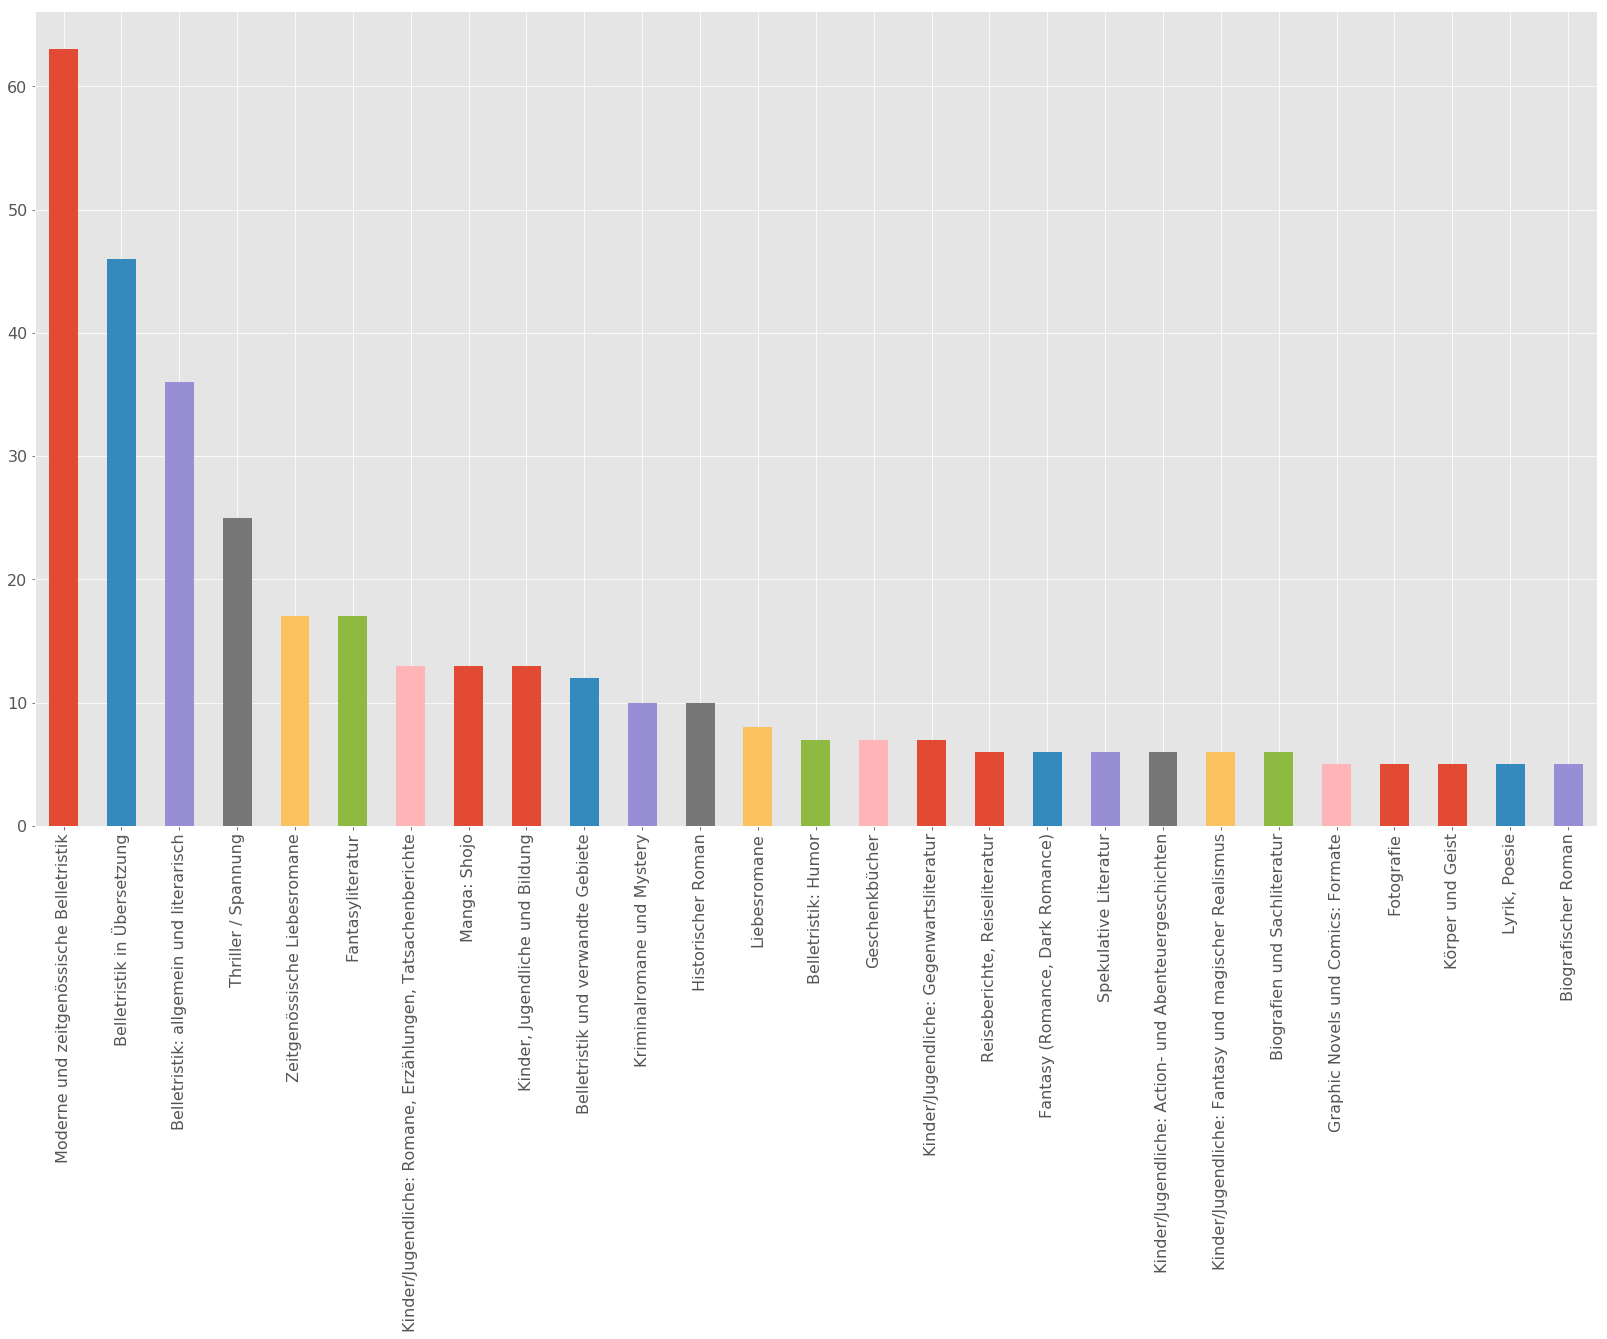

In [19]:
# Exploring the data distribution in our train and test set
# trying to filter out the long tail and keep only themes with count more than 3
def data_explore(dataFrame, attribute, threshold):
    counts = dataFrame[attribute].value_counts()
    counts1 =  counts[counts >= 1]
    print "DISTRIBUTION of THEMES in data is:"
    print counts1
    plot_data_theme = dataFrame[dataFrame[attribute].isin(counts[counts >= threshold].index)]
    plot_data_theme[attribute].value_counts().plot.bar(y=attribute, figsize=(28,15))

data_explore(train, "THEME", 5)

DISTRIBUTION of THEMES in data is:
Moderne und zeitgenössische Belletristik                         11
Belletristik in Übersetzung                                       5
Belletristik: allgemein und literarisch                           5
Manga: Shojo                                                      4
Zeitgenössische Liebesromane                                      3
Kinder, Jugendliche und Bildung                                   2
Biografischer Roman                                               2
Reiseberichte, Reiseliteratur                                     2
Fantasyliteratur                                                  2
Geschenkbücher                                                    2
Thriller / Spannung                                               2
Belletristik und verwandte Gebiete                                2
Komplementäre Therapien, Heilverfahren und Gesundheit             1
Ratgeber, Sachbuch: Psychologie                                   1
Lyrik, Poesie

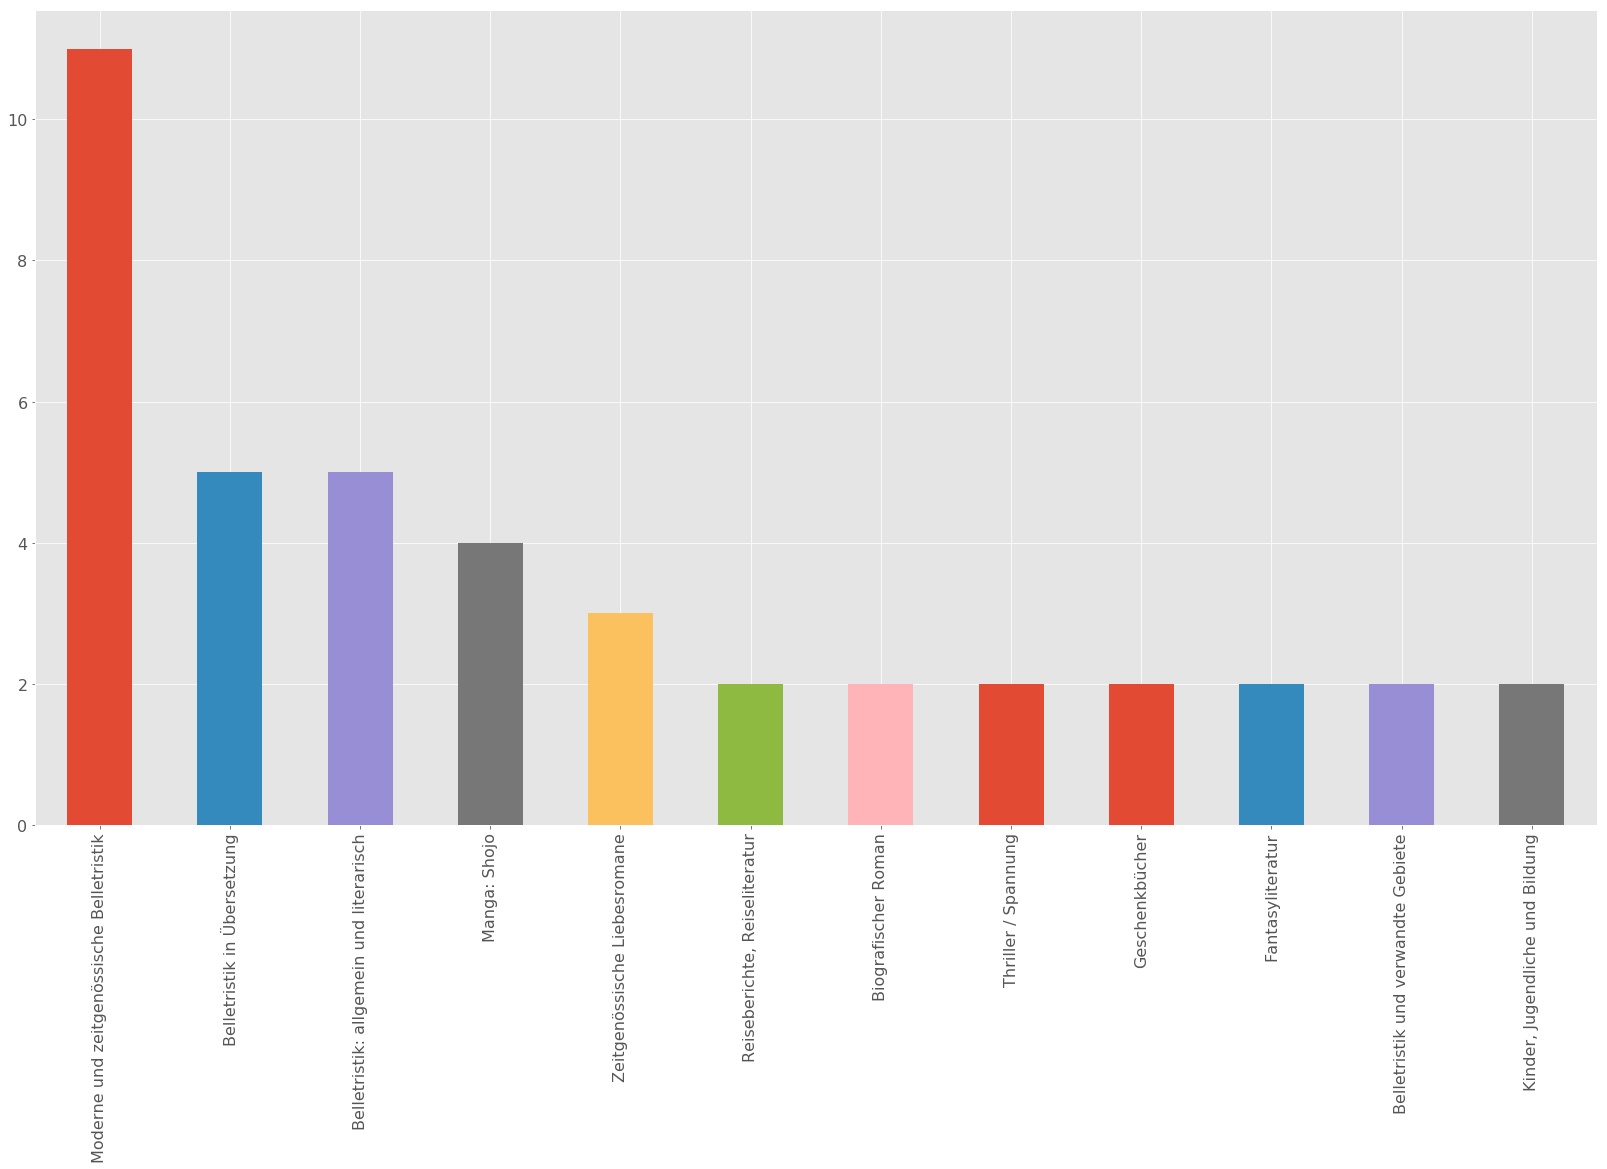

In [22]:
# Exploring the data distribution in our train and test set
# trying to filter out the long tail and keep only themes with count more than 3
data_explore(test_data, "THEME", 2)

In [29]:
# using Averaging over word2Vec(using fb fasttext word embeddings) approach
# ToDo - Use the word vector averaging function to comopute k-nearest neighbors instead of classification.

# wv = model_wiki_de
wv = model
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.layer1_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

# from itertools import islice
# list(islice(wv.vocab, 13000, 13020))

%time tokenized_train_text = [tokenize_only(text.decode('utf-8')) for text in train_data['ADDITIONALTEXT']]
%time tokenized_test_text = [tokenize_only(text.decode('utf-8')) for text in test_data['ADDITIONALTEXT']]
# stopwords removal
tokenized_train_text = [[word for word in text if word not in stop_words] for text in tokenized_train_text]
tokenized_test_text = [[word for word in text if word not in stop_words] for text in tokenized_test_text]

tokenized_train_text[0]
tokenized_test_text[0]

# wv.syn0norm[wv.vocab['konnt'].index]
# wv.vocab['konnt'].index
# # model.wv.vectors_norm[334797]
# model_wiki_de.vectors_norm[334797]
%time
X_train_word_average = word_averaging_list(wv,tokenized_train_text)
X_test_word_average = word_averaging_list(wv,tokenized_test_text)

# X_train_word_average[0]
%time
knn_naive_dv = KNeighborsClassifier(n_neighbors=3, n_jobs=1, algorithm='brute', metric='cosine' )
knn_naive_dv.fit(X_train_word_average, train_data['THEME'])
predicted = knn_naive_dv.predict(X_test_word_average)
evaluate_prediction(predicted, test_data['THEME'])

%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_data['THEME'])
predicted = logreg.predict(X_test_word_average)
evaluate_prediction(predicted, test_data['THEME'])

print test_data.iloc()[28]['THEME']
for word in wv.most_similar(positive=[X_test_word_average[28]], restrict_vocab=100000, topn=30)[0:20]:
    print word[0]

for word in tokenized_test_text[28]:
    print word,

CPU times: user 906 ms, sys: 20.3 ms, total: 926 ms
Wall time: 920 ms
CPU times: user 173 ms, sys: 10.1 ms, total: 183 ms
Wall time: 181 ms
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).



accuracy 0.08695652173913043
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.91 µs


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning:

invalid value encountered in true_divide



accuracy 0.09782608695652174
confusion matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(row=expected, col=predicted)
Kriminalromane und Mystery
naemlich
deshalb
tun
jedenfalls
offenbar
offenkundig
womoeglich
Fall
wohl
eben
anscheinend
zumal
allerdings
moeglicherweise
immer
denen
−_pnp
deswegen
gleichwohl
dennoch
Unfallserie stellt Mordkommisssion Rätsel beiden ermittelnden Kommissare tappen zunächst völlig Dunkeln Ermittlungsansätze verlaufen Sande private Gefühle spielen Rolle. Vergangenheit Opfer finden schließlich Gemeinsamkeit führt Abgründe unserer zivilisierten Gesellschaft Schließlich müssen schwere Entscheidung treffen


In [23]:
# Using Gensim doc2vec model, tagged documents are documents with 'ADDITIONAL TEXT' and tag as 'THEME'
def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_and_stopWordsRemoval(r['ADDITIONALTEXT'].decode('utf-8')), tags=[(r.MATNR)]), axis=1)
print train_tagged.values[:2]

# train_tagged = train_data.apply(
#     lambda r: TaggedDocument(words=tokenize_and_stopWordsRemoval(r['ADDITIONALTEXT'].decode('utf-8')), tags=[(r.THEME).decode('utf-8')]), axis=1)
# print train_tagged.values[:2]
# test_tagged = test_data.apply(
#     lambda r: TaggedDocument(words=tokenize_and_stopWordsRemoval(r['ADDITIONALTEXT'].decode('utf-8')), tags=[(r.THEME).decode('utf-8')]), axis=1)
# print test_tagged.values[:1]

%time
trainsent = train_tagged.values
# testsent = test_tagged.values
print trainsent[1].tags
print trainsent[1].words
# simple gensim doc2vec api
doc2vec_model = Doc2Vec(workers=1, size=100, iter=20, dm=1, min_count=2, epochs=100)
doc2vec_model.build_vocab(trainsent)
%time
doc2vec_model.train(trainsent, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/gensim/models/doc2vec.py:362: UserWarning:

The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/gensim/models/doc2vec.py:366: UserWarning:

The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.

2018-05-28 16:16:07,236 : INFO : collecting all words and their counts
2018-05-28 16:16:07,238 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2018-05-28 16:16:07,251 : INFO : collected 15186 word types and 611 unique tags from a corpus of 611 examples and 34043 words
2018-05-28 16:16:07,252 : INFO : Loading a fresh vocabulary
2018-05-28 16:16:07,266 : INFO : min_count=2 retains 4712 unique words (31% of original 15186, drops 10474)
2018-05-28 16:16:07,268 : INFO : min_count=2 leaves 23569 word corpus (69% of original 34043, drops 10474)
2018-05-28 16:16:07,279 : INFO : deleti

[TaggedDocument(words=[u'PECUNIA', u'Versicherungs-Ratgeber', u'Dirk', u'Magnutzki', u'Sicher', u'vorgesorgt', u'EINFACH', u'VERST\xc4NDLICH', u'NACHVOLLZIEHBAR', u'versteht', u'wirklich', u'Vollkommen', u'neu', u'innovativ', u'Deutschlands', u'Versicherungs-', u'Ratgeber', u'Videobeitr\xe4gen', u'QR-', u'Codes', u'besseren', u'Verst\xe4ndnis', u'hinterlegt', u'Schnell', u'einfach', u'verst\xe4ndlich', u'setzt', u'Video-Buch', u'neue', u'Ma\xdfst\xe4be', u'Endlich', u'Buch', u'Lesertypen', u'ganz', u'gleich', u'Allesleser', u'Nachschlager', u'Querleser', u'kommt', u'Kosten.', u'Schluss', u'Chaos', u'Sachen', u'Versicherungen', u'r\xe4t', u'Verbraucher', u'verunsichert', u'Themen', u'Vorsorge', u'Versicherungsschutz', u'schm\xfccken', u'Hass-Ecke', u'Aktenschrank', u'Lebens-Rentenversicherungen', u'gut', u'schlecht', u'hoch', u'gepriesene', u'staatliche', u'F\xf6rderung', u'privaten', u'Altersvorsorge', u'Flop', u'sinnvoll', u'besten', u'krankenversichern', u'Sachversicherungen', u'brau

2018-05-28 16:16:07,463 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-28 16:16:07,465 : INFO : EPOCH - 2 : training on 34043 raw words (23775 effective words) took 0.1s, 414936 effective words/s
2018-05-28 16:16:07,517 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-28 16:16:07,518 : INFO : EPOCH - 3 : training on 34043 raw words (23781 effective words) took 0.1s, 470761 effective words/s
2018-05-28 16:16:07,570 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-28 16:16:07,571 : INFO : EPOCH - 4 : training on 34043 raw words (23773 effective words) took 0.1s, 466311 effective words/s
2018-05-28 16:16:07,624 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-28 16:16:07,625 : INFO : EPOCH - 5 : training on 34043 raw words (23779 effective words) took 0.1s, 450820 effective words/s
2018-05-28 16:16:07,677 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-05-28 16

In [24]:
# train_targets, train_regressors = zip(
#     *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in trainsent])
# %time
# test_targets, test_regressors = zip(
#     *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])

# logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
# logreg = logreg.fit(train_regressors, train_targets)
# evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))

# %time 
# knn_test_predictions = [
#     doc2vec_model.docvecs.most_similar([pred_vec], topn=1)[0][0]
#     for pred_vec in test_regressors
# ]
# evaluate_prediction(knn_test_predictions, test_targets, str(doc2vec_model))
print type(doc2vec_model.docvecs.doctags)

# below code prints all the document tags -
# for key in doc2vec_model.docvecs.doctags:
#     print key

# print test_tagged.values[1]
# print train_tagged.values[1]

sample_doc = doc2vec_model.docvecs[1]
print sample_doc
# print [doc2vec_model.docvecs.doctags]
k_sim_doc = doc2vec_model.docvecs.most_similar([sample_doc])
print k_sim_doc
# print ' '.join((train['ADDITIONALTEXT'].loc[train['MATNR'] == 'A1000959630']).tolist())
for doc in k_sim_doc:
    print "similarity score = %s" % (doc[1])
    print ' '.join((train['ADDITIONALTEXT'].loc[train['MATNR'] == doc[0]]).tolist())
    print 
# for word in doc2vec_model.most_similar([doc2vec_model.docvecs['A1022787682']], topn=20):
#     print word[0]

# NOTE - KNN results based on doc vectrs dont appear to be so nice. ToDo, some relation between different tags/THEMES can be derived by doc2vec_model.most_similar method once trained on Themes as tags.

2018-05-28 16:17:06,157 : INFO : precomputing L2-norms of doc weight vectors


<type 'dict'>
[-0.39015067 -0.13882071 -0.0694629  -0.00267565 -0.13404727 -0.0672407
  0.10118519  0.19370514 -0.08992142 -0.03386135 -0.27899066 -0.04199788
 -0.04332491 -0.18015985  0.01394475  0.00828587 -0.27506438  0.08344246
  0.3293011   0.23558854 -0.17356771  0.27212933  0.06525099  0.34462127
  0.2723813  -0.24772216  0.11512457 -0.1695951   0.08518405  0.1152923
  0.03429318 -0.142877   -0.07088731  0.2544317   0.01440503 -0.04819287
 -0.19228475 -0.396372   -0.14497839  0.15155335  0.30761388 -0.44136283
  0.13416918  0.0925521  -0.25850996  0.02150387  0.18731941 -0.07267412
 -0.15290946  0.19801976  0.1126328  -0.2715131   0.34530377  0.02609924
 -0.06982838 -0.22105542  0.01204624  0.02776741 -0.01250389 -0.18230139
 -0.34399593  0.01274339 -0.16887242  0.13227612 -0.04765429 -0.3741846
  0.19686984 -0.13409011 -0.18043277 -0.49534783 -0.31836876 -0.16013327
 -0.07084545 -0.04617001  0.17970653 -0.1373897   0.15919289 -0.13741352
  0.14973024 -0.12318926  0.03150057 -0.

In [25]:
# Now checking the performance on WMD - word mover's distance using pretrained word embeddings
for i in range(1,30):
    distance = model_wiki_de.wmdistance(trainsent[i-1].words, trainsent[i].words)
    print 'distance = %.4f between documents %d, %d' % (distance, i-1, i)
    print train_data.iloc()[i-1]['ADDITIONALTEXT']
    print train_data.iloc()[i]['ADDITIONALTEXT']

for sent in trainsent[2:6]:
    print "\n", sent.tags 
    for word in sent.words:
        print word,
for sent in trainsent[19:26]:
    print "\n", sent.tags 
    for word in sent.words:
        print word,

2018-05-28 16:18:07,778 : INFO : Removed 74 and 50 OOV words from document 1 and 2 (respectively).
2018-05-28 16:18:07,780 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:18:07,782 : INFO : built Dictionary(78 unique tokens: [u'unabh\xe4ngiger', u'ausgezeichnet', u'schwimmende', u'spricht', u'braucht']...) from 2 documents (total 83 corpus positions)
2018-05-28 16:18:07,820 : INFO : Removed 50 and 24 OOV words from document 1 and 2 (respectively).
2018-05-28 16:18:07,821 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:18:07,823 : INFO : built Dictionary(53 unique tokens: [u'kr\xe4hen', u'geboren', u'eigenen', u'erschienen', u'stirbt']...) from 2 documents (total 59 corpus positions)
2018-05-28 16:18:07,840 : INFO : Removed 24 and 44 OOV words from document 1 and 2 (respectively).
2018-05-28 16:18:07,841 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:18:07,843 : INFO : built Dictionary(55 unique toke

distance = 4.6355 between documents 0, 1
Wenn der Traum vom Kind zum Albtraum wird<br>Alex und Leslie Twisden, vermögend, erfolgreich und glücklich verheiratet, sind zu allem bereit, um endlich Eltern zu werden. Ein obskurer Arzt in Ljubljana kann dem Paar tatsächlich helfen. Zehn Jahre später hat sich das einst prächtige Haus der Twisdens in einen Ort des Grauens verwandelt. Und obwohl Alex und Leslie ihre Zwillinge Adam und Alice über alles lieben, sperren sie sie nachts in ihren Zimmern ein. Denn sie wissen: Sie haben ihre Kinder zum Fressen gern &amp;#8230;<br>
<p>Ombré - so heißt der Trend zum Farbverlauf, der aus Mode und Beauty nicht mehr wegzudenken ist. Endlich kann man diesen Trend auch selber stricken, und das mit ganz normaler Wolle! Die Technik ist ganz einfach, das Ergebnis fasziniert. So entstehen tolle Trendteile wie Mützen, Tücher, Loops, Kuschelsocken und vieles mehr.</p>
distance = 4.4752 between documents 1, 2
<p>Ombré - so heißt der Trend zum Farbverlauf, der aus M

2018-05-28 16:18:08,044 : INFO : Removed 39 and 26 OOV words from document 1 and 2 (respectively).
2018-05-28 16:18:08,046 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:18:08,047 : INFO : built Dictionary(48 unique tokens: [u'endg\xfcltig', u'aufdringlichen', u'unbefriedigender', u'nachdem', u'wahres']...) from 2 documents (total 48 corpus positions)
2018-05-28 16:18:08,059 : INFO : Removed 26 and 28 OOV words from document 1 and 2 (respectively).
2018-05-28 16:18:08,060 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:18:08,062 : INFO : built Dictionary(47 unique tokens: [u'tun', u'antreten', u'gehalten', u'entschl\xfcsseln', u'wahres']...) from 2 documents (total 47 corpus positions)
2018-05-28 16:18:08,074 : INFO : Removed 28 and 33 OOV words from document 1 and 2 (respectively).
2018-05-28 16:18:08,076 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:18:08,077 : INFO : built Dictionary(61 unique 

distance = 4.2518 between documents 15, 16
<p>Ein magisches Wesen in Gestalt eines Pferdes landet auf der Erde. Es hat die Farben in seiner Mähne und damit auch seine Zauberkräfte verloren, weshalb es nicht in seine Welt zurückkann. Das kleine Mädchen Maren entdeckt die hilflose Stute Davina und bietet ihr Hilfe und Unterstützung an. Gemeinsam machen sich die beiden also auf die Suche nach den verlorengegangenen Farben und müssen bald feststellen, dass sie damit nicht alleine sind: <br>Ein dunkles Pferd, dessen Herz voller Hass und Wut zu sein scheint, trachtet ebenfalls danach. Wie gehen Maren und Davina mit dieser Konkurrenz um? Sind die Freunde dadurch in Gefahr? Wird Davina nach Hause zurückkehren können?</p>
Was noch? Lesen!<br>
distance = 4.7030 between documents 16, 17
Was noch? Lesen!<br>
Seit der erste Band der 'Zwiegespräche mit Gott' veröffentlicht wurde, ist auf der Welt eine Menge passiert: Skrupellose Heinzelmännchen brachen eine schlimme Krise vom Zaun, Kerstin und Karin

2018-05-28 16:18:08,252 : INFO : Removed 26 and 20 OOV words from document 1 and 2 (respectively).
2018-05-28 16:18:08,253 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:18:08,254 : INFO : built Dictionary(38 unique tokens: [u'gehalten', u'sicher', u'furchtbare', u'gequ\xe4lt', u'hochgef\xe4hrliche']...) from 2 documents (total 40 corpus positions)


distance = 4.6511 between documents 27, 28
Eine geheimnisvolle junge Frau schreibt an einen älteren Herrn, Michele<br>Riotta, der seit langem als Notar in Agrigento lebt. In seiner Jugend hat er ein<br>Buch über den impressionistischen Maler Auguste Renoir veröffentlicht, in<br>dem er den Weg zu einem unbekannten Werk des Künstlers weist, das &amp;#8211; abgelegen<br>in einer kalabresischen Dorfkirche &amp;#8211; von der Kunstwelt nie entdeckt<br>worden ist. Die Briefe Riottas lassen ahnen, dass er noch anderes Wissen über<br>Renoir zurückhält, etwa über eine seltsame Reise des Künstlers nach Agrigento,<br>wo dieser in Schwierigkeiten geriet und ein Bild malte, von dem niemand etwas<br>weiß &amp;#8230;<br>In seiner Liebe zu jener rätselhaften Dame verliert Riotta dagegen zunehmend<br>die Kontrolle, und bald enden seine Briefe und die Geschichte der beiden<br>abrupt.<br>Allein aus den Briefen Riottas entwickelt Andrea Camilleri eine Liebesgeschichte<br>und einen Kunst- Krimi, der &amp;#

In [30]:
# Facebook FastText: Using Gensim's implementation of fastText
from gensim.models.fasttext import FastText as FT_gensim
model_gensim = FT_gensim(size=100, min_count=1)

# build the vocabulary
model_gensim.build_vocab(texts)

# train the model
%time model_gensim.train(texts, total_examples=model_gensim.corpus_count, epochs=model_gensim.iter)

print(model_gensim)
model_gensim['das']

print type(model_gensim.wv.vocab)
# for key in model_gensim.wv.vocab:
#     print key

2018-05-28 16:24:32,110 : INFO : collecting all words and their counts
2018-05-28 16:24:32,112 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-05-28 16:24:32,134 : INFO : collected 15186 word types from a corpus of 34043 raw words and 611 sentences
2018-05-28 16:24:32,136 : INFO : Loading a fresh vocabulary
2018-05-28 16:24:32,167 : INFO : min_count=1 retains 15186 unique words (100% of original 15186, drops 0)
2018-05-28 16:24:32,169 : INFO : min_count=1 leaves 34043 word corpus (100% of original 34043, drops 0)
2018-05-28 16:24:32,205 : INFO : deleting the raw counts dictionary of 15186 items
2018-05-28 16:24:32,207 : INFO : sample=0.001 downsamples 6 most-common words
2018-05-28 16:24:32,208 : INFO : downsampling leaves estimated 33835 word corpus (99.4% of prior 34043)
2018-05-28 16:24:33,587 : INFO : estimated required memory for 15186 words, 125424 buckets and 100 dimensions: 74298728 bytes
2018-05-28 16:24:33,591 : INFO : resetting layer weights
2

CPU times: user 3.28 s, sys: 37.2 ms, total: 3.31 s
Wall time: 1.95 s
FastText(vocab=15186, size=100, alpha=0.025)
<type 'dict'>


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [28]:
# Normalizing word vectors do improve "intutitive results". 
# Documents which are similar are infact in close neighborhood.
from time import time
# Normalizing word2vec vectors.
start = time()

model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print 'Cell took %.2f seconds to run.' %(time() - start)

start = time()

model02.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print 'Cell took %.2f seconds to run.' %(time() - start)

start = time()

model_wiki_de.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print 'Cell took %.2f seconds to run.' %(time() - start)

model_gensim.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.
print 'Cell took %.2f seconds to run.' %(time() - start)

2018-05-28 16:21:19,057 : INFO : precomputing L2-norms of word weight vectors
2018-05-28 16:21:24,185 : INFO : precomputing L2-norms of word weight vectors


Cell took 5.13 seconds to run.


2018-05-28 16:21:39,713 : INFO : precomputing L2-norms of word weight vectors


Cell took 15.53 seconds to run.


2018-05-28 16:21:59,251 : INFO : precomputing L2-norms of word weight vectors
2018-05-28 16:21:59,262 : INFO : precomputing L2-norms of ngram weight vectors


Cell took 19.54 seconds to run.
Cell took 19.66 seconds to run.


In [46]:
# Now checking the performance on WMD - word mover's distance using pretrained word embeddings
for i in range(1,30):
    distance = model.wmdistance(trainsent[i-1].words, trainsent[i].words)
    print 'distance = %.4f between documents %d, %d' % (distance, i-1, i)

for i in range(1,30):
    distance = model02.wmdistance(trainsent[i-1].words, trainsent[i].words)
    print 'distance = %.4f between documents %d, %d' % (distance, i-1, i)

2018-05-11 15:27:37,218 : INFO : Removed 8 and 13 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,220 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,222 : INFO : built Dictionary(56 unique tokens: [u'stets', u'ahnend', u'Mauer', u'lassen', u'Asta']...) from 2 documents (total 61 corpus positions)
2018-05-11 15:27:37,252 : INFO : Removed 13 and 16 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,254 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,256 : INFO : built Dictionary(82 unique tokens: [u'ahnend', u'heran', u'feststellen', u'stehen', u'Mauer']...) from 2 documents (total 94 corpus positions)
2018-05-11 15:27:37,296 : INFO : Removed 16 and 13 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,297 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,299 : INFO : built Dictionary(82 unique tokens: [u'Russlands', u'dient', u'fes

distance = 1.0594 between documents 0, 1
distance = 1.0220 between documents 1, 2
distance = 1.0893 between documents 2, 3
distance = 1.0663 between documents 3, 4
distance = 0.9867 between documents 4, 5
distance = 1.0258 between documents 5, 6
distance = 1.1087 between documents 6, 7


2018-05-11 15:27:37,480 : INFO : Removed 16 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,482 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,483 : INFO : built Dictionary(99 unique tokens: [u'eindringlicher', u'all', u'Freiheit', u'Wehrmacht', u'Jahre']...) from 2 documents (total 109 corpus positions)
2018-05-11 15:27:37,538 : INFO : Removed 6 and 4 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,540 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,541 : INFO : built Dictionary(70 unique tokens: [u'ferne', u'lebendig', u'konnte', u'Wehrmacht', u'deutschen']...) from 2 documents (total 74 corpus positions)
2018-05-11 15:27:37,562 : INFO : Removed 4 and 23 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,564 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,566 : INFO : built Dictionary(77 unique tokens: [u'Macht', u'fe

distance = 1.0589 between documents 7, 8
distance = 1.0433 between documents 8, 9
distance = 1.1075 between documents 9, 10
distance = 1.1047 between documents 10, 11
distance = 1.0862 between documents 11, 12
distance = 1.0909 between documents 12, 13
distance = 1.0854 between documents 13, 14


2018-05-11 15:27:37,716 : INFO : Removed 15 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,717 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,718 : INFO : built Dictionary(102 unique tokens: [u'all', u'Andreas', u'Forschung', u'Glauben', u'immer']...) from 2 documents (total 120 corpus positions)
2018-05-11 15:27:37,780 : INFO : Removed 6 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,781 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,783 : INFO : built Dictionary(61 unique tokens: [u'all', u'Andreas', u'teils', u'Schein', u'Gedichte']...) from 2 documents (total 66 corpus positions)
2018-05-11 15:27:37,802 : INFO : Removed 6 and 25 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,803 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,805 : INFO : built Dictionary(98 unique tokens: [u'Respekt', u'Erstmals', u'Fr

distance = 1.0729 between documents 14, 15
distance = 1.0479 between documents 15, 16
distance = 1.1268 between documents 16, 17
distance = 1.1071 between documents 17, 18


2018-05-11 15:27:37,919 : INFO : Removed 4 and 13 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,920 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,922 : INFO : built Dictionary(75 unique tokens: [u'unsicher', u'vorzeitig', u'Finden', u'Bald', u'Eltern']...) from 2 documents (total 90 corpus positions)
2018-05-11 15:27:37,952 : INFO : Removed 13 and 11 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,953 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,955 : INFO : built Dictionary(83 unique tokens: [u'vorzeitig', u'Mut', u'Finden', u'kennenzulernen', u'schwierige']...) from 2 documents (total 103 corpus positions)
2018-05-11 15:27:37,991 : INFO : Removed 11 and 2 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:37,993 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:37,994 : INFO : built Dictionary(87 unique tokens: [u'gerontopsyc

distance = 1.0902 between documents 18, 19
distance = 1.0660 between documents 19, 20
distance = 0.9773 between documents 20, 21
distance = 1.0378 between documents 21, 22
distance = 1.1060 between documents 22, 23
distance = 1.1299 between documents 23, 24
distance = 1.0684 between documents 24, 25
distance = 1.1064 between documents 25, 26


2018-05-11 15:27:38,180 : INFO : Removed 13 and 16 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,181 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,183 : INFO : built Dictionary(83 unique tokens: [u'Elfriede', u'Einschlafen', u'Hof', u'Habt', u'Betrachtung']...) from 2 documents (total 94 corpus positions)
2018-05-11 15:27:38,217 : INFO : Removed 16 and 15 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,219 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,221 : INFO : built Dictionary(73 unique tokens: [u'Mut', u'all', u'Lebenserwartung', u'Zahl', u'ganz']...) from 2 documents (total 77 corpus positions)
2018-05-11 15:27:38,243 : INFO : Removed 3 and 2 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,245 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,246 : INFO : built Dictionary(72 unique tokens: [u'stets', u'Vergangenhe

distance = 1.0661 between documents 26, 27
distance = 1.0414 between documents 27, 28
distance = 1.0949 between documents 28, 29
distance = 0.4917 between documents 0, 1
distance = 0.4906 between documents 1, 2


2018-05-11 15:27:38,384 : INFO : Removed 8 and 3 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,386 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,387 : INFO : built Dictionary(74 unique tokens: [u'Schwarzer', u'geboren', u'Gier', u'helfen', u'motivierende']...) from 2 documents (total 76 corpus positions)
2018-05-11 15:27:38,410 : INFO : Removed 3 and 1 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,411 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,413 : INFO : built Dictionary(83 unique tokens: [u'bedrohen', u'geboren', u'Gier', u'Jahre', u'voll']...) from 2 documents (total 89 corpus positions)
2018-05-11 15:27:38,448 : INFO : Removed 1 and 10 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,449 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,451 : INFO : built Dictionary(88 unique tokens: [u'Hai', u'geboren', u'Jahr

distance = 0.5113 between documents 2, 3
distance = 0.5169 between documents 3, 4
distance = 0.4820 between documents 4, 5
distance = 0.5114 between documents 5, 6
distance = 0.5453 between documents 6, 7
distance = 0.5222 between documents 7, 8


2018-05-11 15:27:38,666 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,667 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,669 : INFO : built Dictionary(79 unique tokens: [u'ferne', u'lebendig', u'konnte', u'Wehrmacht', u'deutschen']...) from 2 documents (total 83 corpus positions)
2018-05-11 15:27:38,697 : INFO : Removed 1 and 7 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,699 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,700 : INFO : built Dictionary(94 unique tokens: [u'Macht', u'unserer', u'eigenen', u'verliert', u'pers\xf6nliche']...) from 2 documents (total 97 corpus positions)
2018-05-11 15:27:38,733 : INFO : Removed 7 and 3 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,734 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,736 : INFO : built Dictionary(106 unique tokens: [u'Macht', u'un

distance = 0.4962 between documents 8, 9
distance = 0.5494 between documents 9, 10
distance = 0.5481 between documents 10, 11
distance = 0.5304 between documents 11, 12
distance = 0.5493 between documents 12, 13
distance = 0.5588 between documents 13, 14


2018-05-11 15:27:38,900 : INFO : Removed 7 and 0 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:38,902 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,904 : INFO : built Dictionary(116 unique tokens: [u'all', u'Andreas', u'Forschung', u'Glauben', u'immer']...) from 2 documents (total 134 corpus positions)
2018-05-11 15:27:38,982 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:38,983 : INFO : built Dictionary(72 unique tokens: [u'k\xfcnstlerische', u'all', u'Andreas', u'teils', u'Dollar']...) from 2 documents (total 78 corpus positions)
2018-05-11 15:27:39,013 : INFO : Removed 0 and 12 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,014 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,016 : INFO : built Dictionary(113 unique tokens: [u'Respekt', u'Erstmals', u'Frage', u'Verbindung', u'pers\xf6nliche']...) from 2 documents (total 124 corpus positions)

distance = 0.5460 between documents 14, 15
distance = 0.5143 between documents 15, 16
distance = 0.5601 between documents 16, 17
distance = 0.5551 between documents 17, 18


2018-05-11 15:27:39,181 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,183 : INFO : built Dictionary(92 unique tokens: [u'f\xfchren', u'Eltern', u'Trennung', u'Sinn', u'entdeckt']...) from 2 documents (total 107 corpus positions)
2018-05-11 15:27:39,232 : INFO : Removed 0 and 1 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,233 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,235 : INFO : built Dictionary(105 unique tokens: [u'verlassen', u'Frage', u'immer', u'st\xe4rker', u'Konflikt']...) from 2 documents (total 126 corpus positions)
2018-05-11 15:27:39,302 : INFO : Removed 1 and 0 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,303 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,305 : INFO : built Dictionary(99 unique tokens: [u'beide', u'Frage', u'immer', u'erfahren', u'psychiatrischen']...) from 2 documents (total 111 corpus positions)
20

distance = 0.5419 between documents 18, 19
distance = 0.5142 between documents 19, 20
distance = 0.4700 between documents 20, 21
distance = 0.5192 between documents 21, 22
distance = 0.5725 between documents 22, 23


2018-05-11 15:27:39,409 : INFO : Removed 2 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,411 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,412 : INFO : built Dictionary(110 unique tokens: [u'endg\xfcltig', u'Castor', u'Mosel', u'Tote', u'nachdem']...) from 2 documents (total 115 corpus positions)
2018-05-11 15:27:39,488 : INFO : Removed 6 and 3 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,489 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,491 : INFO : built Dictionary(82 unique tokens: [u'all', u'sch\xf6nste', u'tats\xe4chlich', u'Hauch', u'V\xf6lker']...) from 2 documents (total 88 corpus positions)
2018-05-11 15:27:39,529 : INFO : Removed 3 and 0 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,531 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,532 : INFO : built Dictionary(113 unique tokens: [u'Einschlafen'

distance = 0.5762 between documents 23, 24
distance = 0.5073 between documents 24, 25
distance = 0.5239 between documents 25, 26
distance = 0.5278 between documents 26, 27


2018-05-11 15:27:39,610 : INFO : built Dictionary(103 unique tokens: [u'Einschlafen', u'all', u'Winter', u'Soldaten', u'sage']...) from 2 documents (total 114 corpus positions)
2018-05-11 15:27:39,667 : INFO : Removed 9 and 6 OOV words from document 1 and 2 (respectively).
2018-05-11 15:27:39,668 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 15:27:39,670 : INFO : built Dictionary(89 unique tokens: [u'all', u'ganz', u'ben\xf6tigt', u'sage', u'Autonarr']...) from 2 documents (total 93 corpus positions)


distance = 0.5251 between documents 27, 28
distance = 0.5591 between documents 28, 29


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

2018-05-28 16:26:10,721 : INFO : precomputing L2-norms of word weight vectors
2018-05-28 16:26:10,839 : INFO : precomputing L2-norms of ngram weight vectors
2018-05-28 16:26:11,758 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:11,760 : INFO : built Dictionary(190 unique tokens: [u'Versicherer', u'Lebenslage', u'eigenen', u'ganz', u'Pecunia']...) from 2 documents (total 207 

2018-05-28 16:26:15,418 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:15,420 : INFO : built Dictionary(121 unique tokens: [u'Offenbar', u'spricht', u'eigenen', u'furchtbare', u'hochgef\xe4hrliche']...) from 2 documents (total 127 corpus positions)
2018-05-28 16:26:15,524 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:15,526 : INFO : built Dictionary(109 unique tokens: [u'T\xe4terrolle', u'eigenen', u'ganz', u'gequ\xe4lt', u'Nachdenken']...) from 2 documents (total 113 corpus positions)
2018-05-28 16:26:15,591 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:15,592 : INFO : built Dictionary(161 unique tokens: [u'Dach', u'eigenen', u'Beule', u'mitunter', u'Nachdenken']...) from 2 documents (total 164 corpus positions)
2018-05-28 16:26:15,831 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:15,833 : INFO : built Dictionary(105 unique tokens: [u'Dach', u'eigenen'

2018-05-28 16:26:19,814 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:19,815 : INFO : built Dictionary(147 unique tokens: [u'meistert', u'eigenen', u'ganz', u'gro\xdfen', u'verliert']...) from 2 documents (total 157 corpus positions)
2018-05-28 16:26:20,006 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:20,008 : INFO : built Dictionary(120 unique tokens: [u'eigenen', u'Beule', u'weshalb', u'Nachdenken', u'bietet']...) from 2 documents (total 129 corpus positions)
2018-05-28 16:26:20,112 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:20,114 : INFO : built Dictionary(101 unique tokens: [u'Dach', u'eigenen', u'Beule', u'Nachdenken', u'Kikerex']...) from 2 documents (total 105 corpus positions)
2018-05-28 16:26:20,157 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:20,159 : INFO : built Dictionary(143 unique tokens: [u'Eltern', u'eigenen', u'Beule', u'Nachdenk

2018-05-28 16:26:23,070 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:23,072 : INFO : built Dictionary(108 unique tokens: [u'eigenen', u'Beule', u'Esskultur', u'Nachdenken', u'Kikerex']...) from 2 documents (total 113 corpus positions)
2018-05-28 16:26:23,143 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:23,144 : INFO : built Dictionary(151 unique tokens: [u'Pappenheimer', u'spricht', u'eigenen', u'Beule', u'Nachdenken']...) from 2 documents (total 156 corpus positions)
2018-05-28 16:26:23,332 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:23,334 : INFO : built Dictionary(104 unique tokens: [u'eigenen', u'ganz', u'Nachdenken', u'Kikerex', u'Tiererz\xe4hlungen']...) from 2 documents (total 117 corpus positions)
2018-05-28 16:26:23,391 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:23,393 : INFO : built Dictionary(123 unique tokens: [u'Dach', u'eigenen', u

2018-05-28 16:26:27,986 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:27,987 : INFO : built Dictionary(150 unique tokens: [u'all', u'Eltern', u'spricht', u'eigenen', u'Beule']...) from 2 documents (total 157 corpus positions)
2018-05-28 16:26:28,206 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:28,208 : INFO : built Dictionary(199 unique tokens: [u'eigenen', u'Mauer', u'Beule', u'Europ\xe4er', u'Nachdenken']...) from 2 documents (total 215 corpus positions)
2018-05-28 16:26:28,608 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:28,610 : INFO : built Dictionary(98 unique tokens: [u'sprechen', u'eigenen', u'Beule', u'Nachdenken', u'\xf6ffnen']...) from 2 documents (total 99 corpus positions)
2018-05-28 16:26:28,650 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:28,652 : INFO : built Dictionary(113 unique tokens: [u'geboren', u'Eltern', u'fremde', u'eigenen'

2018-05-28 16:26:34,845 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:34,846 : INFO : built Dictionary(108 unique tokens: [u'eigenen', u'Beule', u'Mitteln', u'Nachdenken', u'landet']...) from 2 documents (total 113 corpus positions)
2018-05-28 16:26:34,913 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:34,914 : INFO : built Dictionary(117 unique tokens: [u'eigenen', u'miteinander', u'Beule', u'beide', u'Nachdenken']...) from 2 documents (total 122 corpus positions)
2018-05-28 16:26:34,996 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:34,998 : INFO : built Dictionary(177 unique tokens: [u'Freiheit', u'denen', u'eigenen', u'Beule', u'gro\xdfen']...) from 2 documents (total 187 corpus positions)
2018-05-28 16:26:35,380 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:35,381 : INFO : built Dictionary(146 unique tokens: [u'sprechen', u'geboren', u'mitten', u'ei

2018-05-28 16:26:39,230 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:39,232 : INFO : built Dictionary(125 unique tokens: [u'eigenen', u'Jahre', u'Beule', u'Nachdenken', u'Ehe']...) from 2 documents (total 129 corpus positions)
2018-05-28 16:26:39,347 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:39,349 : INFO : built Dictionary(134 unique tokens: [u'hingegen', u'stehen', u'eigenen', u'Mauer', u'Beule']...) from 2 documents (total 138 corpus positions)
2018-05-28 16:26:39,497 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:39,499 : INFO : built Dictionary(118 unique tokens: [u'Weltkrieg', u'Eltern', u'eigenen', u'Beule', u'Nachdenken']...) from 2 documents (total 122 corpus positions)
2018-05-28 16:26:39,598 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:39,599 : INFO : built Dictionary(133 unique tokens: [u'Dach', u'absagen', u'eigenen', u'Beule', u'Nach

2018-05-28 16:26:43,004 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:43,006 : INFO : built Dictionary(130 unique tokens: [u'endet', u'Druck', u'eigenen', u'Jahre', u'Beule']...) from 2 documents (total 137 corpus positions)
2018-05-28 16:26:43,132 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:43,133 : INFO : built Dictionary(95 unique tokens: [u'eigenen', u'Beule', u'Nachdenken', u'Leib', u'Kikerex']...) from 2 documents (total 98 corpus positions)
2018-05-28 16:26:43,167 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:43,169 : INFO : built Dictionary(119 unique tokens: [u'Macht', u'eigenen', u'Beule', u'Nachdenken', u'Abgr\xfcnden']...) from 2 documents (total 124 corpus positions)
2018-05-28 16:26:43,276 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:43,278 : INFO : built Dictionary(115 unique tokens: [u'eigenen', u'Beule', u'mu\xdf', u'Nachdenken', u'

2018-05-28 16:26:47,683 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:47,685 : INFO : built Dictionary(130 unique tokens: [u'Nachbarschaft', u'eigenen', u'Beule', u'russische', u'Nachdenken']...) from 2 documents (total 133 corpus positions)
2018-05-28 16:26:47,817 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:47,819 : INFO : built Dictionary(114 unique tokens: [u'Idyle', u'eigenen', u'Beule', u'Nachdenken', u'immer']...) from 2 documents (total 115 corpus positions)
2018-05-28 16:26:47,899 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:47,901 : INFO : built Dictionary(92 unique tokens: [u'eigenen', u'Jahre', u'Beule', u'Nachdenken', u'Kikerex']...) from 2 documents (total 93 corpus positions)
2018-05-28 16:26:47,932 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:47,934 : INFO : built Dictionary(138 unique tokens: [u'eigenen', u'Paris', u'passionierter',

2018-05-28 16:26:51,099 : INFO : built Dictionary(130 unique tokens: [u'eigenen', u'Beule', u'Nachdenken', u'bereits', u'k\xf6nnen.Peter']...) from 2 documents (total 137 corpus positions)
2018-05-28 16:26:51,244 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:51,246 : INFO : built Dictionary(112 unique tokens: [u'all', u'eigenen', u'ganz', u'Nachdenken', u'Prinzessin']...) from 2 documents (total 116 corpus positions)
2018-05-28 16:26:51,323 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:51,325 : INFO : built Dictionary(150 unique tokens: [u'Dach', u'eigenen', u'erzeugst', u'Beule', u'Richtung']...) from 2 documents (total 164 corpus positions)
2018-05-28 16:26:51,545 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:51,546 : INFO : built Dictionary(122 unique tokens: [u'eigenen', u'Beule', u'\xf6ffnet', u'Begleitung', u'immer']...) from 2 documents (total 130 corpus positions)
2018-05-28 16

2018-05-28 16:26:56,115 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:56,116 : INFO : built Dictionary(105 unique tokens: [u'eigenen', u'Beule', u'Nachdenken', u'immer', u'Lehrerin']...) from 2 documents (total 111 corpus positions)
2018-05-28 16:26:56,170 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:56,172 : INFO : built Dictionary(125 unique tokens: [u'Ma\xdfe', u'Beule', u'leiv', u'Nachdenken', u'Bremer']...) from 2 documents (total 129 corpus positions)
2018-05-28 16:26:56,287 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:56,289 : INFO : built Dictionary(110 unique tokens: [u'eigenen', u'Beule', u'unterwegs.', u'Nachdenken', u'unterirdischen']...) from 2 documents (total 114 corpus positions)
2018-05-28 16:26:56,351 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:56,353 : INFO : built Dictionary(147 unique tokens: [u'endg\xfcltig', u'eigenen', u'mit

2018-05-28 16:26:59,608 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:59,610 : INFO : built Dictionary(106 unique tokens: [u'eigenen', u'Beule', u'Nachdenken', u'Ziel', u'K\xf6nig']...) from 2 documents (total 109 corpus positions)
2018-05-28 16:26:59,667 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:59,668 : INFO : built Dictionary(127 unique tokens: [u'tats\xe4chlich', u'eigenen', u'Morgowski', u'Beule', u'Nachdenken']...) from 2 documents (total 133 corpus positions)
2018-05-28 16:26:59,806 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:59,807 : INFO : built Dictionary(108 unique tokens: [u'Dach', u'eigenen', u'ganz', u'Nachdenken', u'Kikerex']...) from 2 documents (total 113 corpus positions)
2018-05-28 16:26:59,873 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:26:59,875 : INFO : built Dictionary(118 unique tokens: [u'f\xfchren', u'Eltern', u'eigenen',

2018-05-28 16:27:02,598 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:02,599 : INFO : built Dictionary(115 unique tokens: [u'spricht', u'eigenen', u'ganz', u'Nachdenken', u'bietet']...) from 2 documents (total 117 corpus positions)
2018-05-28 16:27:02,693 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:02,694 : INFO : built Dictionary(118 unique tokens: [u'geboren', u'eigenen', u'Beule', u'Nachdenken', u'immer']...) from 2 documents (total 125 corpus positions)
2018-05-28 16:27:02,789 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:02,791 : INFO : built Dictionary(127 unique tokens: [u'eigenen', u'Beule', u'Nachdenken', u'Portr\xe4ts', u'Fans']...) from 2 documents (total 215 corpus positions)
2018-05-28 16:27:02,925 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:02,927 : INFO : built Dictionary(114 unique tokens: [u'eigenen', u'Beule', u'B\xfcttel', u'Nach

2018-05-28 16:27:05,559 : INFO : built Dictionary(156 unique tokens: [u'spricht', u'eigenen', u'Beule', u'Satz', u'Nachdenken']...) from 2 documents (total 158 corpus positions)
2018-05-28 16:27:05,789 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:05,791 : INFO : built Dictionary(113 unique tokens: [u'einsamen', u'ehemalige', u'Beule', u'verlassen', u'unterwegs.']...) from 2 documents (total 117 corpus positions)
2018-05-28 16:27:05,869 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:05,870 : INFO : built Dictionary(115 unique tokens: [u'eigenen', u'Beule', u'gro\xdfen', u'Nachdenken', u'Kikerex']...) from 2 documents (total 119 corpus positions)
2018-05-28 16:27:05,961 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:05,962 : INFO : built Dictionary(110 unique tokens: [u'eigenen', u'Beule', u'gro\xdfen', u'Nachdenken', u'Kikerex']...) from 2 documents (total 112 corpus positions)
2018-05-2

2018-05-28 16:27:10,066 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:10,068 : INFO : built Dictionary(138 unique tokens: [u'eigenen', u'kennenlernt', u'Beule', u'Nachdenken', u'Kikerex']...) from 2 documents (total 145 corpus positions)
2018-05-28 16:27:10,222 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:10,223 : INFO : built Dictionary(110 unique tokens: [u'verschrieben', u'spricht', u'eigenen', u'Schriftstellerin', u'Beule']...) from 2 documents (total 112 corpus positions)
2018-05-28 16:27:10,293 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:10,295 : INFO : built Dictionary(163 unique tokens: [u'Eltern', u'stehen', u'eigenen', u'Beule', u'filtern']...) from 2 documents (total 174 corpus positions)
2018-05-28 16:27:10,515 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:10,517 : INFO : built Dictionary(131 unique tokens: [u'tats\xe4chlich', u'eigenen'

2018-05-28 16:27:14,066 : INFO : built Dictionary(101 unique tokens: [u'eigenen', u'Beule', u'Nachdenken', u'Kikerex', u'Tiererz\xe4hlungen']...) from 2 documents (total 104 corpus positions)
2018-05-28 16:27:14,110 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:14,112 : INFO : built Dictionary(116 unique tokens: [u'all', u'eigenen', u'Paris', u'Nachdenken', u'Abstand']...) from 2 documents (total 125 corpus positions)
2018-05-28 16:27:14,210 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:14,211 : INFO : built Dictionary(97 unique tokens: [u'eigenen', u'Beule', u'Nachdenken', u'sieht', u'Kikerex']...) from 2 documents (total 98 corpus positions)
2018-05-28 16:27:14,245 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:14,246 : INFO : built Dictionary(121 unique tokens: [u'gestresst', u'spricht', u'eigenen', u'Beule', u'Nachdenken']...) from 2 documents (total 126 corpus positions)
2018-05-28

2018-05-28 16:27:17,969 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:17,970 : INFO : built Dictionary(110 unique tokens: [u'eigenen', u'ganz', u'leiv', u'Nachdenken', u'Kikerex']...) from 2 documents (total 116 corpus positions)
2018-05-28 16:27:18,044 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:18,045 : INFO : built Dictionary(113 unique tokens: [u'Dach', u'eigenen', u'Beule', u'Mitteln', u'Nachdenken']...) from 2 documents (total 117 corpus positions)
2018-05-28 16:27:18,136 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:18,137 : INFO : built Dictionary(111 unique tokens: [u'ausgraben', u'eigenen', u'Beule', u'Nachdenken', u'Kikerex']...) from 2 documents (total 113 corpus positions)
2018-05-28 16:27:18,215 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:18,216 : INFO : built Dictionary(106 unique tokens: [u'eigenen', u'Paris', u'Nachdenken', u'Leipz

2018-05-28 16:27:21,409 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:21,411 : INFO : built Dictionary(120 unique tokens: [u'eigenen', u'Beule', u'unterwegs.', u'Glauben', u'schenken']...) from 2 documents (total 130 corpus positions)
2018-05-28 16:27:21,508 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:21,509 : INFO : built Dictionary(122 unique tokens: [u'geboren', u'Zeichenkurse', u'Beule', u'unterwegs.', u'Nachdenken']...) from 2 documents (total 125 corpus positions)
2018-05-28 16:27:21,621 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:21,623 : INFO : built Dictionary(110 unique tokens: [u'Macht', u'eigenen', u'Beule', u'Lauterbachs', u'unterwegs.']...) from 2 documents (total 114 corpus positions)
2018-05-28 16:27:21,693 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:21,694 : INFO : built Dictionary(126 unique tokens: [u'eigenen', u'ganz', u'Nachd

2018-05-28 16:27:25,247 : INFO : built Dictionary(168 unique tokens: [u'geboren', u'spricht', u'eigenen', u'Beule', u'Frage']...) from 2 documents (total 177 corpus positions)
2018-05-28 16:27:25,553 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:25,554 : INFO : built Dictionary(115 unique tokens: [u'f\xfchren', u'Kampf', u'miteinander', u'Beule', u'Nachdenken']...) from 2 documents (total 119 corpus positions)
2018-05-28 16:27:25,642 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:25,644 : INFO : built Dictionary(132 unique tokens: [u'Dach', u'spricht', u'eigenen', u'Beule', u'Nachdenken']...) from 2 documents (total 139 corpus positions)
2018-05-28 16:27:25,797 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:25,799 : INFO : built Dictionary(174 unique tokens: [u'eigenen', u'L\xe4nder\xfcbersicht', u'gro\xdfen', u'Nachdenken', u'kleinen']...) from 2 documents (total 186 corpus positions)
2

2018-05-28 16:27:29,243 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:29,245 : INFO : built Dictionary(132 unique tokens: [u'NCIS', u'Rays', u'eigenen', u'\xe4hnlich.', u'gro\xdfen']...) from 2 documents (total 136 corpus positions)
2018-05-28 16:27:29,394 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:29,395 : INFO : built Dictionary(145 unique tokens: [u'eigenen', u'schwebt', u'Gef\xe4\xdf', u'J\xe4ger', u'brechen']...) from 2 documents (total 158 corpus positions)
2018-05-28 16:27:29,586 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:29,587 : INFO : built Dictionary(134 unique tokens: [u'f\xfchren', u'Druck', u'Tote', u'Beule', u'Risse']...) from 2 documents (total 142 corpus positions)
2018-05-28 16:27:29,731 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-28 16:27:29,733 : INFO : built Dictionary(154 unique tokens: [u'mitten', u'eigenen', u'Marthaler', u'Beule

Cell took 80.97 seconds to run.


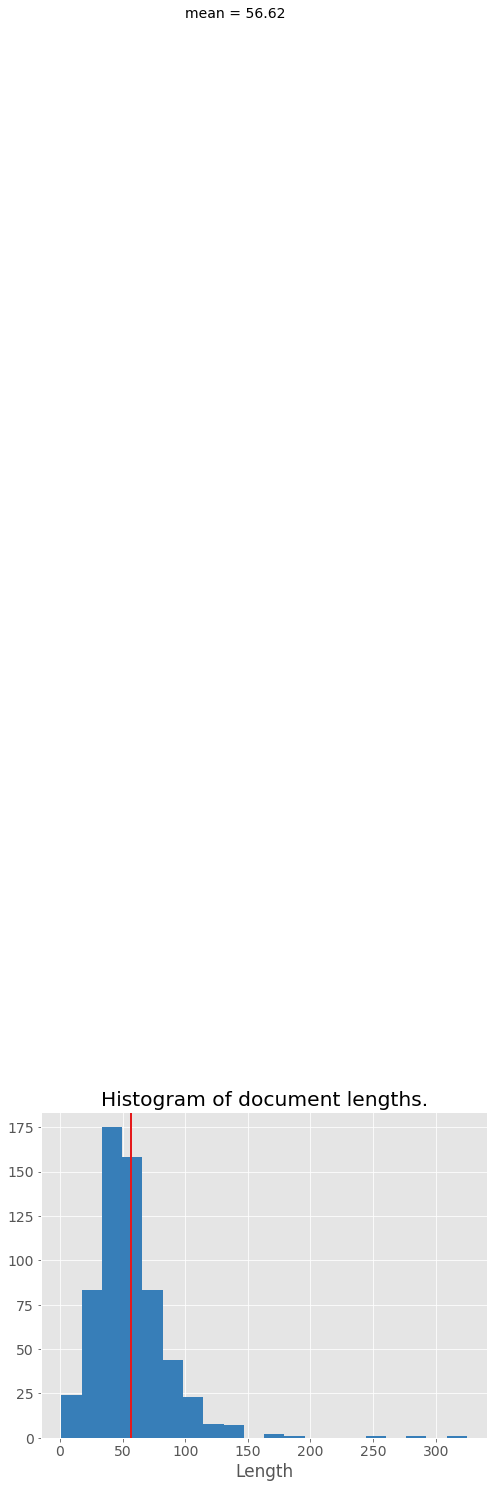

In [32]:
# Similarity queries on WMD distances
# Document lengths.
lens = [len(doc) for doc in texts_lemmatized]

# Plot.
plt.rc('figure', figsize=(8,6))
plt.rc('font', size=14)
plt.rc('lines', linewidth=2)
plt.rc('axes', color_cycle=('#377eb8','#e41a1c','#4daf4a',
                            '#984ea3','#ff7f00','#ffff33'))
# Histogram.
plt.hist(lens, bins=20)
plt.hold(True)
# Average length.
avg_len = sum(lens) / float(len(lens))
plt.axvline(avg_len, color='#e41a1c')
plt.hold(False)
plt.title('Histogram of document lengths.')
plt.xlabel('Length')
plt.text(100, 800, 'mean = %.2f' % avg_len)
# plt.show()

# Initialize WmdSimilarity.
from gensim.similarities import WmdSimilarity
num_best = 10
instance = WmdSimilarity(texts, model_gensim, num_best=10)
start = time()

sims = instance[texts[1]]  # A query is simply a "look-up" in the similarity class.
print 'Cell took %.2f seconds to run.' %(time() - start)

In [33]:
# Print the query and the retrieved documents, together with their similarities.
print 'Query:'
print train.iloc()[1]['ADDITIONALTEXT']
# print " ".join(texts_lemmatized[1])
# print type(sims)
for i in range(num_best):
    print
    print 'sim = %.4f' % sims[i][1]
    print sims[i][0]
    print train.iloc()[sims[i][0]]['THEME']
    print train.iloc()[sims[i][0]]['ADDITIONALTEXT']
#     print (" ").join(texts[sims[i][0]])

Query:
Hündchen Bello möchte krähen können wie Hahn Kikerex. Ob dem Hündchen das gelingt? Entlein Schnatterinchen findet in ihrem eigenen Schatten einen prima Freund. Doch kann dieser in der Not auch helfen? Die Schildkröte Immerlangsam landet bei einem Sturm auf dem Rücken. Nun spricht sie nur noch rückwärts. Und Elefant Louis und Tiger Streifchen reimen und singen gemeinsam ein Lied auf die Freundschaft. Dreißig Tiererzählungen voller Klugheit und Humor laden große und kleine Kinder zum Staunen, Lachen und Nachdenken ein - ein Hörspaß für Kindergarten, zu Hause und unterwegs.<br>Aus dem Inhalt: Bunte Tierkinder - Der glücklichste Tag - Das seltsame Rezept - Der dickköpfige Esel - Die schwimmende Wasserfontäne - Mondsplitter auf dem Dach - Die Wolke im Trog - Der Igel, der gestreichelt werden wollte - Die Beule - Der faule Seehund - Das springende Häuschen u. v. a.<br>Das gleichnamige Buch ist im leiv Leipziger Kinderbuchverlag erschienen.

sim = 1.0000
1
Kinder/Jugendliche: Romane, E

In [108]:
# print train.iloc()[11]['ADDITIONALTEXT']
# print train.iloc()[2]['ADDITIONALTEXT']
# print train.iloc()[272]['ADDITIONALTEXT']
# print (" ").join(texts[11])
distance = model_wiki_de.wmdistance(texts[1], texts[158])
print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/(1. + distance)), 1 , 158)

distance = model.wmdistance(texts[11], texts[272])
print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/distance), 11 , 272)

distance = model.wmdistance(texts[2], texts[272])
print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/distance), 2 , 272)

# for i in range(100):
#     distance = model.wmdistance(texts[11], texts[i])
#     print 'distance = %.4f between documents %d, %d' % (distance, 11 , i)

# Findings - the distance calculated can be greater than 1 for model01, thus the sim values are b/w (0,1) while for model02, distances are less than 1 and sim can be > 1

2018-05-18 16:02:50,390 : INFO : Removed 50 and 24 OOV words from document 1 and 2 (respectively).
2018-05-18 16:02:50,392 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 16:02:50,393 : INFO : built Dictionary(50 unique tokens: [u'kr\xe4hen', u'eins', u'eigenen', u'erschienen', u'erfolgreiche']...) from 2 documents (total 52 corpus positions)
2018-05-18 16:02:50,409 : INFO : Removed 10 and 7 OOV words from document 1 and 2 (respectively).
2018-05-18 16:02:50,410 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 16:02:50,411 : INFO : built Dictionary(59 unique tokens: [u'Zugabe', u'tiefer', u'anwenden', u'Basis', u'typische']...) from 2 documents (total 69 corpus positions)
2018-05-18 16:02:50,427 : INFO : Removed 8 and 7 OOV words from document 1 and 2 (respectively).
2018-05-18 16:02:50,429 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-18 16:02:50,430 : INFO : built Dictionary(60 unique tokens: [u'geboren', u's

distance = 1.0339 sim = 0.4917 between documents 1, 158
distance = 1.0133 sim = 0.9869 between documents 11, 272
distance = 1.1362 sim = 0.8801 between documents 2, 272


In [63]:
print train.iloc()[10]['ADDITIONALTEXT']

Das bekannteste Buch der großen Theosophin. Ein Schlüssel zur  esoterischen Tradition und ein wertvoller Wegbegleiter durch den  Alltag. Eines jener Grundlagenwerke, die in jede esoterische  Bibliothek gehören!


In [80]:
for word in model_gensim.wv.most_similar('Tote'):
    print word[0],
distance = model_gensim.wv.wmdistance(texts[2], texts[272])
print 'distance = %.4f sim = %.4f between documents %d, %d' % (distance, (1.0/distance), 2 , 272)

möchte Toten erste möchten Jahrhunderts erster geheimnisvollen Entführung Fähigkeiten Landschaft distance = 0.9853 sim = 1.0149 between documents 2, 272
